In [1]:
import os
import pandas as pd
from pandas import ExcelWriter
import pickle
import imblearn
import numpy as np
import sklearn
import copy
from pandasql import *
from pandasql import sqldf
sql = lambda q: sqldf(q, globals()) 

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from mlxtend.classifier import StackingClassifier
from sklearn.decomposition import PCA
from scipy import interp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, f1_score

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix,f1_score
from sklearn.metrics import precision_recall_fscore_support, classification_report, accuracy_score, make_scorer

from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

pd.set_option('display.float_format', lambda x: '%.3f' %x)
pd.set_option('display.float_format', lambda x: '%.f' %x)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)  
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,8

print('This file is located in the following directory: \n'+os.getcwd())

/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipython-5.3.0-py3.6.egg/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


This file is located in the following directory: 
/Users/Work/Desktop/Work/Projects/Microsoft Capstone


In [2]:
features = pd.read_csv('/Users/Work/Desktop/Work/Projects/Microsoft Capstone/Microsoft_-_DAT102x_Predicting_Earthquake_Damage_in_Nepal_-_Training_values.csv')
labels = pd.read_csv('/Users/Work/Desktop/Work/Projects/Microsoft Capstone/Microsoft_-_DAT102x_Predicting_Earthquake_Damage_in_Nepal_-_Training_labels.csv')

Quantitative variable count_families was excluded because it is a discrete feature.  Features were trimmed at the 1% and 99% levels so that boxplots would look reasonable.

In [3]:
df=copy.deepcopy(features)
df['damage_grade']=labels['damage_grade']
numeric_outcome=df[['count_floors_pre_eq','age','area','height','count_families','damage_grade']]
num_trim=numeric_outcome.drop('damage_grade',axis=1)

for j in range(len(num_trim.columns)):
    p01=num_trim.iloc[:,j].quantile(.01)
    p99=num_trim.iloc[:,j].quantile(.99)
    trim=lambda x: p01 if x<p01 else p99 if x>p99 else x
    num_trim.iloc[:,j]=num_trim.iloc[:,j].map(trim)
    
num_trim['damage_grade']=labels['damage_grade']

# Create tableau EDA csv file

In [4]:
num_trim_rename=copy.deepcopy(num_trim)
num_trim_rename.columns = ['count_floors_pre_eq_trim','age_trim','area_trim',\
                          'height_trim','count_families_trim','damage_grade']
num_trim_rename=num_trim_rename.drop('damage_grade',axis=1)
df_tableau=pd.concat([df,num_trim_rename],axis=1)
df_tableau.to_csv('/Users/Work/Desktop/Work/Projects/Microsoft Capstone/data.csv')

# Inspect feature values

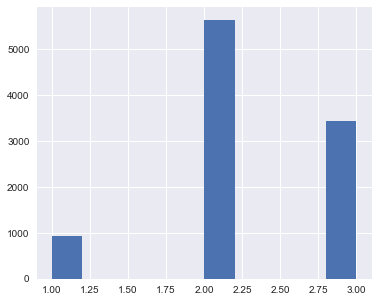

In [5]:
labels['damage_grade'].hist(figsize=(6,5))

## Numerical feature histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f08c4e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f70fe48>]], dtype=object)

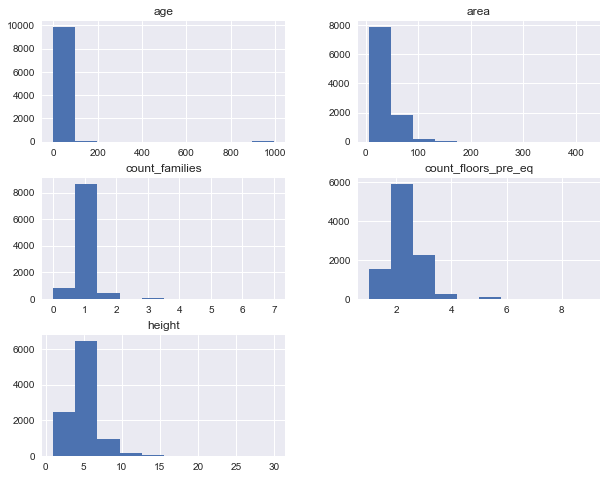

In [6]:
features[["count_floors_pre_eq", "age", "area", "height", "count_families"]].hist()

In examining histograms for outlier trimmed age, area, and height predictors, observe that all of these predictors have right-skewed distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1225b6080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122847d68>]], dtype=object)

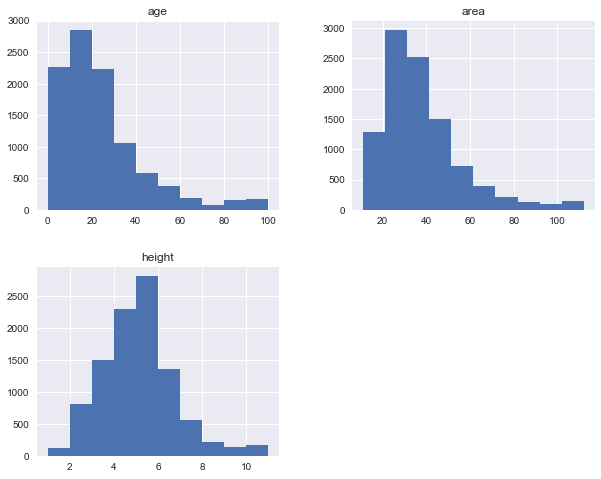

In [43]:
num_trim[["age", "area", "height"]].hist()

# Categorical Feature Histograms

In [5]:
categoricals=features.drop(["count_floors_pre_eq", "age", "area", "height", 
               "count_families","building_id"],axis=1)

## Binary feature histograms

All binary predictors are imbalanced, meaning the majority of their values fall into one class.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117092908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c78a470>]], dtype=object)

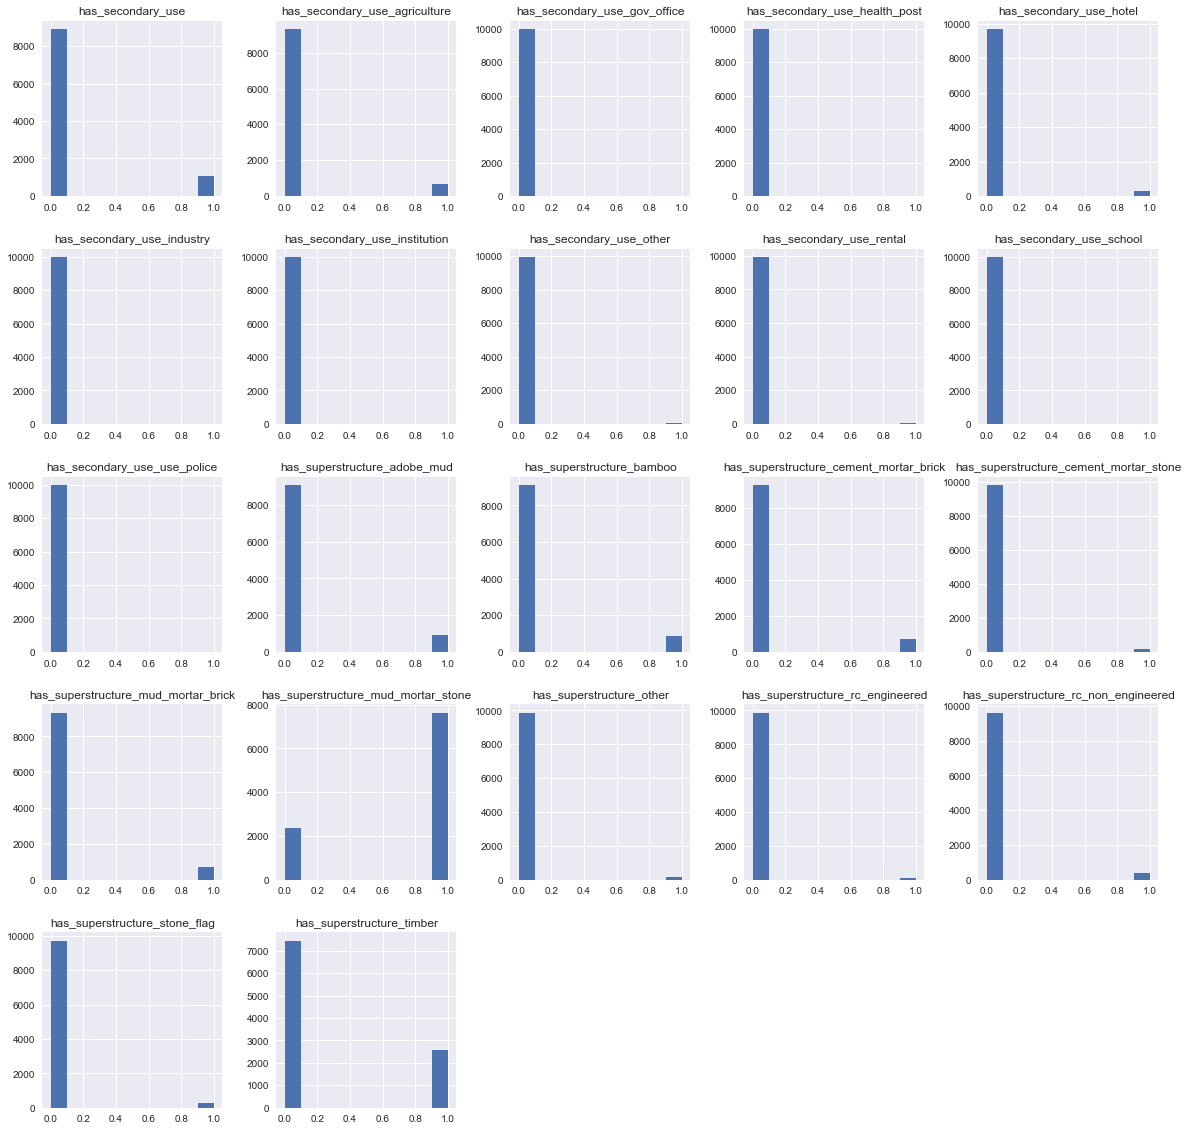

In [6]:
categoricals.drop(["geo_level_1_id","geo_level_2_id","geo_level_3_id"],axis=1).hist(figsize=(20,20))

## Polytomous feature histograms

In [6]:
poly_categoricals=categoricals.loc[:,["geo_level_1_id","geo_level_2_id","geo_level_3_id",
                   "land_surface_condition","foundation_type","roof_type",
                   "ground_floor_type","other_floor_type", "position",
                   "plan_configuration","legal_ownership_status"]]
poly_categoricals2=poly_categoricals.drop(["geo_level_1_id","geo_level_2_id",
                   "geo_level_3_id"],axis=1) #these categoricals have too many levels to show

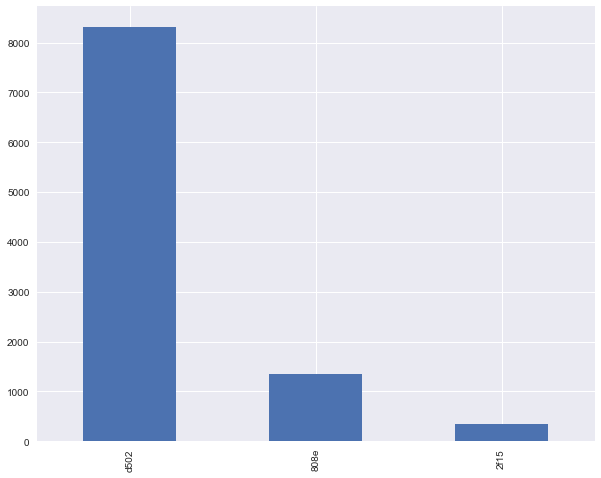

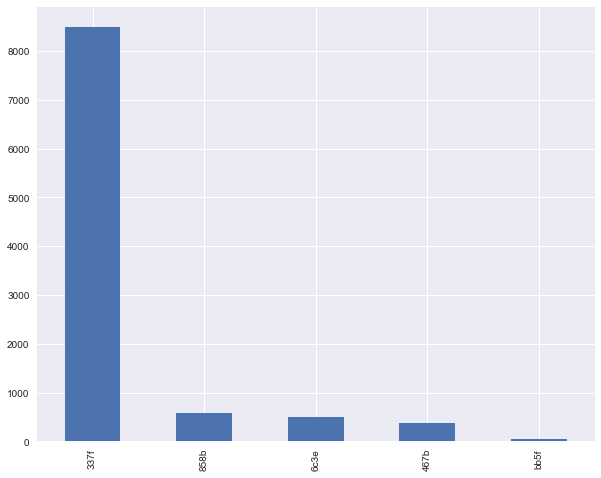

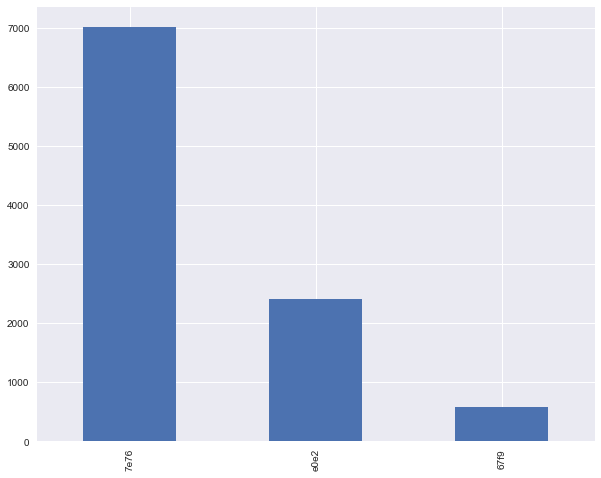

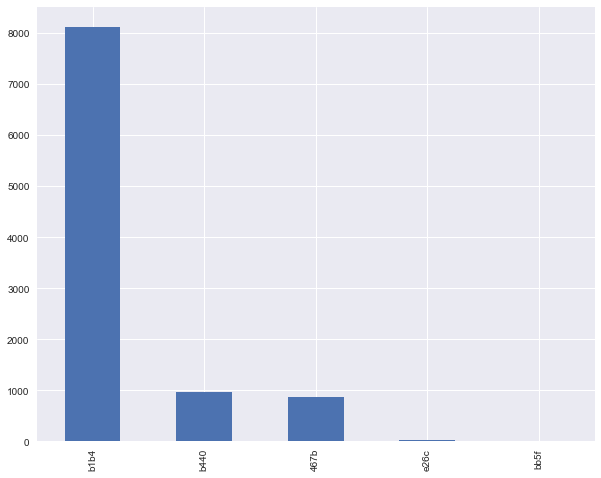

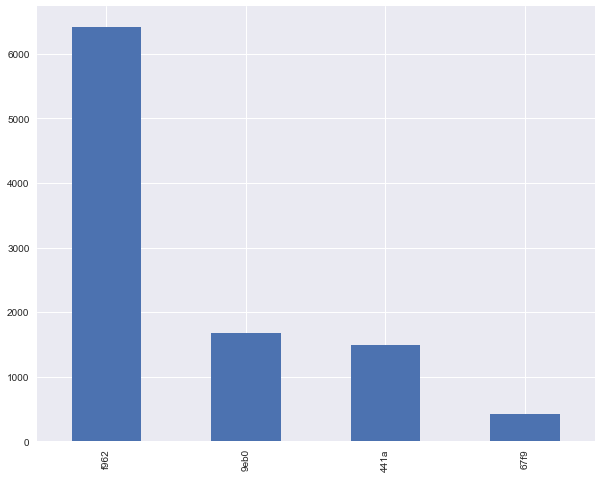

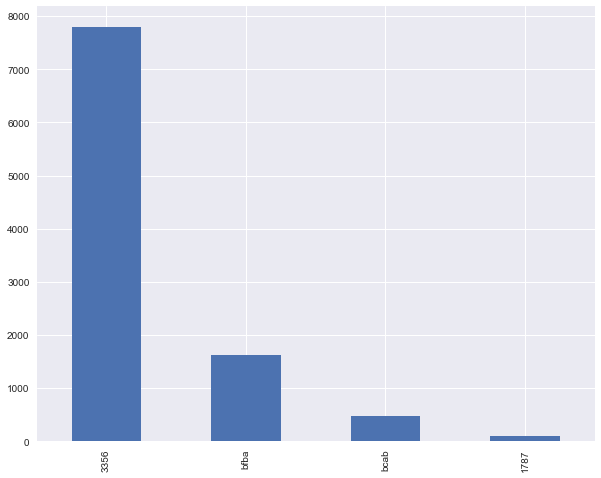

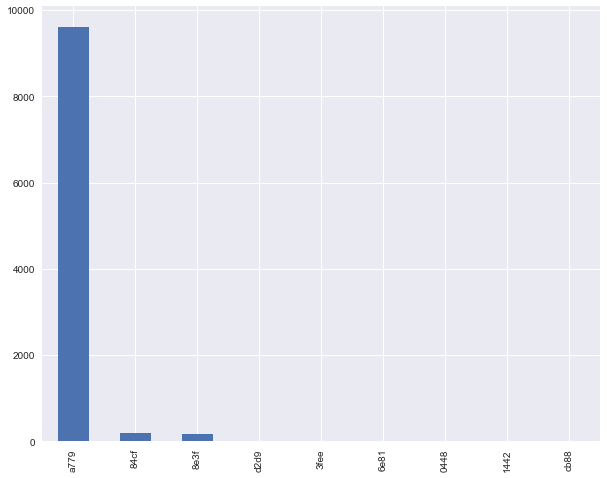

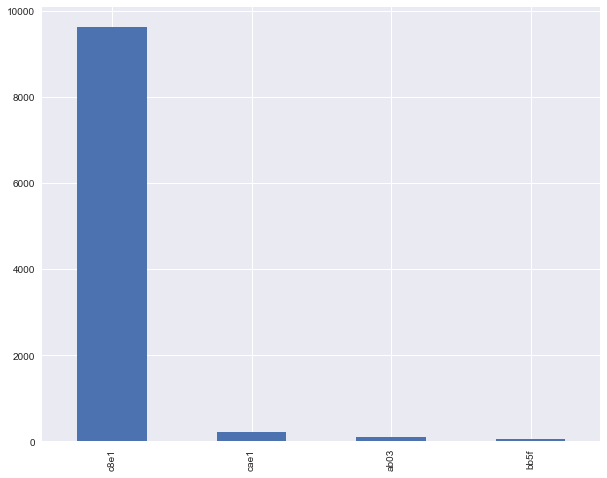

In [47]:
for j in range(len(poly_categoricals2.columns)):
    poly_categoricals2.iloc[:,j].value_counts().plot(kind='bar')
    plt.show()

# Quantitative feature min/max values

In [48]:
features[["count_floors_pre_eq", "age", "area", "height", "count_families"]]\
    .describe().loc[['min','max']].transpose()

,min,max
count_floors_pre_eq,1.000,9.000
age,0.000,995.000
area,6.000,425.000
height,1.000,30.000
count_families,0.000,7.000


# Missing Values Check

There are no missing values.

In [7]:
features.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area                                      0
height                                    0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

# Continuous Feature Multicollinearity Check

Height is strongly correlated with count_floors_pre_eq (.771).  We observe below that count_floors is more correlated with damage_grade, so if we have to remove a predictor, it'll probably be height.

In [37]:
numeric_outcome.drop('damage_grade',axis=1).corr()

,count_floors_pre_eq,age,area,height,count_families
count_floors_pre_eq,1.000,0.100,0.110,0.771,0.099
age,0.100,1.000,-0.004,0.080,0.023
area,0.110,-0.004,1.000,0.212,0.083
height,0.771,0.080,0.212,1.000,0.066
count_families,0.099,0.023,0.083,0.066,1.000


[MLENS] backend: threading


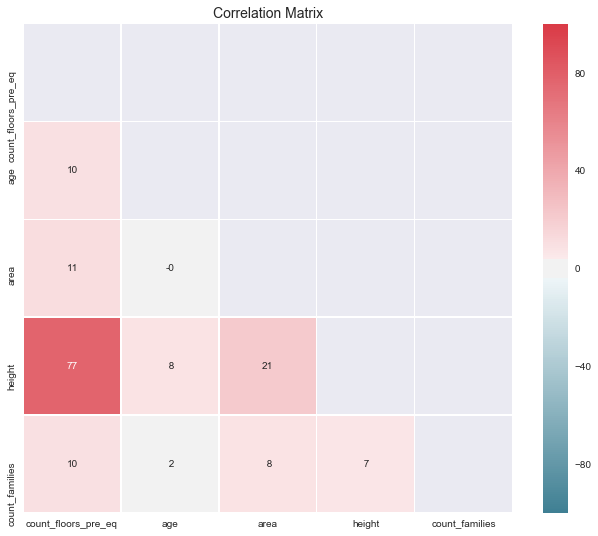

In [7]:
from mlens.visualization import corrmat
corrmat(numeric_outcome.drop('damage_grade',axis=1).corr())

# Continuous Feature Relatedness to Outcome

Quantitative predictors number of floors and building area have stronger correlations with damage_grade than height, age, and number of families, thus suggesting greater predictiveness of these predictors in the models.  However, these 2 predictors still just have weak correlations with damage_grade. <br>

Pearson and spearman coefficients are similar.  Though, the pearson coefficient for building age is low when its outliers are not trimmed, while the spearman coefficient is unaffected.  

Spearman coefficients are for measuring the relationship between ordinals or continuous, while pearson is meant for continuous variables, so it is more appropriate to examine spearman correlations. <br>

source: <br>
http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/

In [64]:
num_trim.corr(method='spearman')['damage_grade'] 
numeric_outcome.corr(method='spearman')['damage_grade']

count_floors_pre_eq    0.135
age                    0.163
area                  -0.083
height                 0.068
count_families         0.050
damage_grade           1.000
Name: damage_grade, dtype: float64

count_floors_pre_eq    0.135
age                    0.163
area                  -0.083
height                 0.068
count_families         0.050
damage_grade           1.000
Name: damage_grade, dtype: float64

In [63]:
num_trim.corr(method='pearson')['damage_grade']
numeric_outcome.corr(method='pearson')['damage_grade']

count_floors_pre_eq    0.126
age                    0.140
area                  -0.119
height                 0.039
count_families         0.053
damage_grade           1.000
Name: damage_grade, dtype: float64

count_floors_pre_eq    0.112
age                    0.038
area                  -0.115
height                 0.032
count_families         0.045
damage_grade           1.000
Name: damage_grade, dtype: float64

In inspecting the box plots, it looks like all trimmed quantitative predictors are somewhat correlated to the response, though number of building floors looks the most correlated.

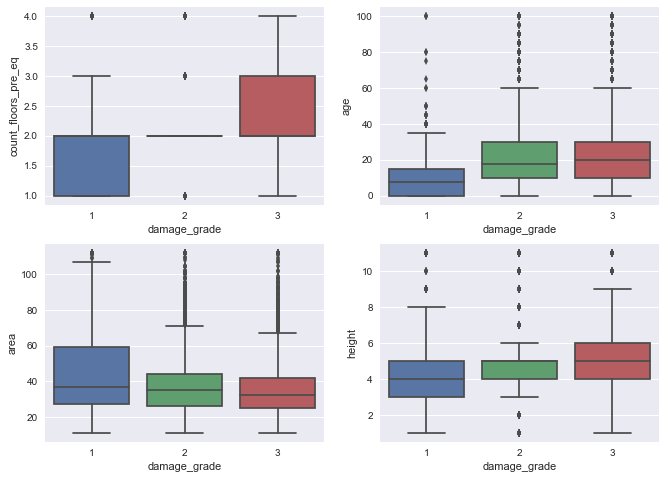

In [49]:
fig, axes = plt.subplots(2,2,figsize=(11,8))
sns.boxplot(x="damage_grade", y="count_floors_pre_eq", data=num_trim,ax=axes[0,0])
sns.boxplot(x="damage_grade", y="age", data=num_trim,ax=axes[0,1])
sns.boxplot(x="damage_grade", y="area", data=num_trim,ax=axes[1,0])
sns.boxplot(x="damage_grade", y="height", data=num_trim,ax=axes[1,1])

In [67]:
numerics.head(1)

,count_floors_pre_eq,age,area,height,damage_grade
0,2.000,25.000,33.000,4.000,2


In inspecting mean quantitative (non-trimmed) predictor levels for each damage grade, there appears to be noticable differences.  Higher damage grades have mean building ages that are higher.  Low damage grades have mean building areas that are higher. It appears that are quantitative variables have likely have some predictive value.

In [69]:
numerics.groupby('damage_grade').count_floors_pre_eq.mean()
numerics.groupby('damage_grade').age.mean()
numerics.groupby('damage_grade').area.mean()
numerics.groupby('damage_grade').height.mean()

damage_grade
1   1.838
2   2.139
3   2.211
Name: count_floors_pre_eq, dtype: float64

damage_grade
1   10.650
2   22.427
3   23.603
Name: age, dtype: float64

damage_grade
1   45.335
2   37.991
3   36.100
Name: area, dtype: float64

damage_grade
1   4.355
2   4.660
3   4.680
Name: height, dtype: float64

# Categorical Predictor Correlations

In [8]:
cat_corrs=df[['ground_floor_type', 'foundation_type','roof_type',\
              "has_secondary_use_school","damage_grade"]]
cat_outcome=copy.deepcopy(categoricals).drop(
    ["geo_level_1_id","geo_level_2_id","geo_level_3_id"],axis=1)
cat_outcome['damage_grade']=labels.damage_grade

For each categorical predictor, I inspect whether there is a sizable difference between each level’s proportion of observations that had damage grade 3.  If a certain level has a greater proportion of damage grade 3's compared with other levels, then when the predictor has as a value that level, then it is more likely that the damage_grade will have value 3.

I excluded geo_level_1_id, geo_level_2_id, geo_level_3_id from this analysis because they had too many categorical levels.

38% of foundation_type's 337f level have damage grade 3, while other levels have 25% or less damage_grade <br>

39% of has_superstructure_mud_mortar_stone Y=1 observations have damage_grade 3, while only 20% of Y=0 observations have damage grade 3 <br>

34% of has_superstructure_cement_mortar_stone=1 have damage grade 3, while only 12% of has_superstructure_cement_mortar_stone=0 have damage_grade 3 <br>

The above patterns are not exhaustive, but the bottomline is that there appears to be patterns in the categorical data between predictor levels and damage_grade.

In [107]:
for j in range(0,len(cat_outcome.columns)-1):
    ct=pd.crosstab(index=cat_outcome.damage_grade,columns=cat_outcome.iloc[:,j])
    ct
    for j in range(len(ct.columns)):
        print(ct.iloc[:,j].name, round(ct.iloc[2,j]/np.sum(ct.iloc[:,j]),4))

land_surface_condition,2f15,808e,d502
damage_grade,,,
1,35,102,801
2,191,821,4624
3,121,419,2886


2f15 0.3487
808e 0.3122
d502 0.3473


foundation_type,337f,467b,6c3e,858b,bb5f
damage_grade,,,,,
1,411,217,123,174,13
2,4812,150,312,339,23
3,3266,5,69,74,12


337f 0.3847
467b 0.0134
6c3e 0.1369
858b 0.1261
bb5f 0.25


roof_type,67f9,7e76,e0e2
damage_grade,,,
1,275,518,145
2,275,4011,1350
3,29,2478,919


67f9 0.0501
7e76 0.3536
e0e2 0.3807


ground_floor_type,467b,b1b4,b440,bb5f,e26c
damage_grade,,,,,
1,367,477,89,0,5
2,467,4605,542,7,15
3,41,3036,332,3,14


467b 0.0469
b1b4 0.374
b440 0.3448
bb5f 0.3
e26c 0.4118


other_floor_type,441a,67f9,9eb0,f962
damage_grade,,,,
1,316,188,155,279
2,741,205,894,3796
3,439,22,628,2337


441a 0.2934
67f9 0.053
9eb0 0.3745
f962 0.3645


position,1787,3356,bcab,bfba
damage_grade,,,,
1,3,728,61,146
2,77,4419,295,845
3,28,2645,121,632


1787 0.2593
3356 0.3395
bcab 0.2537
bfba 0.3894


plan_configuration,0448,1442,3fee,6e81,84cf,8e3f,a779,cb88,d2d9
damage_grade,,,,,,,,,
1,0,0,3,2,21,25,885,0,2
2,1,2,10,4,106,108,5396,0,9
3,1,0,0,0,73,25,3322,1,4


0448 0.5
1442 0.0
3fee 0.0
6e81 0.0
84cf 0.365
8e3f 0.1582
a779 0.3459
cb88 1.0
d2d9 0.2667


has_superstructure_adobe_mud,0,1
damage_grade,,
1,912,26
2,5111,525
3,3080,346


0 0.3383
1 0.3857


has_superstructure_mud_mortar_stone,0,1
damage_grade,,
1,606,332
2,1294,4342
3,474,2952


0 0.1997
1 0.3871


has_superstructure_stone_flag,0,1
damage_grade,,
1,933,5
2,5474,162
3,3294,132


0 0.3396
1 0.4415


has_superstructure_cement_mortar_stone,0,1
damage_grade,,
1,901,37
2,5506,130
3,3403,23


0 0.3469
1 0.1211


has_superstructure_mud_mortar_brick,0,1
damage_grade,,
1,909,29
2,5182,454
3,3221,205


0 0.3459
1 0.298


has_superstructure_cement_mortar_brick,0,1
damage_grade,,
1,701,237
2,5195,441
3,3379,47


0 0.3643
1 0.0648


has_superstructure_timber,0,1
damage_grade,,
1,632,306
2,4109,1527
3,2698,728


0 0.3627
1 0.2843


has_superstructure_bamboo,0,1
damage_grade,,
1,827,111
2,5074,562
3,3222,204


0 0.3532
1 0.2326


has_superstructure_rc_non_engineered,0,1
damage_grade,,
1,811,127
2,5402,234
3,3387,39


0 0.3528
1 0.0975


has_superstructure_rc_engineered,0,1
damage_grade,,
1,842,96
2,5596,40
3,3424,2


0 0.3472
1 0.0145


has_superstructure_other,0,1
damage_grade,,
1,914,24
2,5564,72
3,3381,45


0 0.3429
1 0.3191


legal_ownership_status,ab03,bb5f,c8e1,cae1
damage_grade,,,,
1,4,4,875,55
2,48,33,5445,110
3,46,24,3307,49


ab03 0.4694
bb5f 0.3934
c8e1 0.3435
cae1 0.229


has_secondary_use,0.0,1.0
damage_grade,,
1,784,154
2,4962,674
3,3168,258


0.0 0.3554
1.0 0.2376


has_secondary_use_agriculture,0,1
damage_grade,,
1,895,43
2,5196,440
3,3236,190


0 0.3469
1 0.2823


has_secondary_use_hotel,0,1
damage_grade,,
1,867,71
2,5469,167
3,3370,56


0 0.3472
1 0.1905


has_secondary_use_rental,0,1
damage_grade,,
1,917,21
2,5599,37
3,3420,6


0 0.3442
1 0.0938


has_secondary_use_institution,0,1
damage_grade,,
1,935,3
2,5632,4
3,3426,0


0 0.3428
1 0.0


has_secondary_use_school,0,1
damage_grade,,
1,933,5
2,5634,2
3,3426,0


0 0.3428
1 0.0


has_secondary_use_industry,0,1
damage_grade,,
1,936,2
2,5632,4
3,3424,2


0 0.3427
1 0.25


has_secondary_use_health_post,0,1
damage_grade,,
1,938,0
2,5634,2
3,3426,0


0 0.3427
1 0.0


has_secondary_use_gov_office,0,1
damage_grade,,
1,937,1
2,5635,1
3,3426,0


0 0.3427
1 0.0


has_secondary_use_use_police,0,1
damage_grade,,
1,938,0
2,5635,1
3,3426,0


0 0.3426
1 0.0


has_secondary_use_other,0,1
damage_grade,,
1,925,13
2,5608,28
3,3414,12


0 0.3432
1 0.2264


# EDA Quiz Solutions

In [9]:
df.groupby('damage_grade').age.mean() 

damage_grade
1   12.633
2   26.965
3   26.302
Name: age, dtype: float64

In [15]:
df.groupby('damage_grade').height.mean()  #buildings that suffered more damage are taller

damage_grade
1   4.416
2   4.670
3   4.690
Name: height, dtype: float64

In [51]:
df['height'].mean()
grade_one=df[df.damage_grade==1]
grade_two=df[df.damage_grade==2]
grade_three=df[df.damage_grade==3]

len(grade_one[grade_one.height<=4.65])/len(grade_one)
len(grade_two[grade_two.height<=4.65])/len(grade_two)
len(grade_three[grade_three.height<=4.65])/len(grade_three)
# most damage grade one's are below average height, while most grade 2 & 3 are above avg height

4.6531000000000002

0.5831556503198294

0.47427253371185235

0.44395796847635727

In [52]:
df[df.area>38.44]['damage_grade'].mean() 
#areas greater than the mean have an avg damage grade that is medium level

2.1868632707774798

# Convert multi-level categoricals into dummies

In [7]:
dummies=pd.get_dummies(poly_categoricals2,drop_first=True)
df2=df.drop(["land_surface_condition","foundation_type","roof_type",
                   "ground_floor_type","other_floor_type", "position",
                   "plan_configuration","legal_ownership_status"],axis=1)
df2=pd.concat([df2,dummies],axis=1)
df2=df2.drop(["geo_level_1_id", "geo_level_2_id", "geo_level_3_id"],axis=1)
X=df2.drop(['damage_grade','building_id'],axis=1)
y=df2['damage_grade']

This categorical variable representing subregions, where a number number means a smaller subregion, has too many levels to one-hot encode, so I am excluding it for now.

In [58]:
len(X['geo_level_1_id'].unique())
len(X['geo_level_2_id'].unique())
len(X['geo_level_3_id'].unique())

31

1137

5172

# Parameters for 3-Fold Nested Cross Validation

Grid search includes feature selection and optimizes for accuracy.  Cv score is micro averaged F1 Score.

In [13]:
scaler=MinMaxScaler()
base=DecisionTreeClassifier(max_depth=1, random_state=0) 
feature_selection=SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=0))

classifiers = [
    DecisionTreeClassifier(random_state=0),
    LogisticRegression(random_state=0,multi_class='multinomial'),
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                      metric='minkowski', metric_params=None, n_jobs=1),
    RandomForestClassifier(warm_start=True, oob_score=True,random_state=0,n_estimators=300),
    svm.SVC(random_state=0,probability=True), 
    AdaBoostClassifier(base_estimator=base, n_estimators = 100, random_state=0) ,
    GradientBoostingClassifier(random_state=0, max_features='sqrt')]

param=list()
cross_val=list()
method_names=['Decision Tree','Logistic Regression', 'K Nearest Neighbors', 'Random Forests',
             'Support Vector Machines', 'AdaBoost', 'Gradient Boosting Classifier','Naive Bayes']

param.append({"fselect__threshold":[1e-5,1e-4,1e-3], "clf__max_depth":[2,3,4,5]})
param.append({"fselect__threshold":[1e-5,1e-4,1e-3],
              'clf__C': [10**-4, 10**-2, 10**0, 10**2, 10**4],
              'clf__solver':["lbfgs", "sag", "newton-cg"]})
param.append({"fselect__threshold":[1e-5,1e-4,1e-3]})
param.append({"fselect__threshold":[1e-5,1e-4,1e-3],'clf__n_neighbors': [3,4,5,6,7]})
param.append({"fselect__threshold":[1e-5,1e-4,1e-3],'clf__max_features': ['sqrt',.2,.5,.8]})
param.append({"fselect__threshold":[1e-5,1e-4,1e-3],'clf__C': [.001, .01, .1, 1, 10], "clf__gamma": [.001, .01, .1, 1]})
param.append({"fselect__threshold":[1e-5,1e-4,1e-3],'clf__learning_rate': [.01,.1,1,2]})
param.append({"fselect__threshold":[1e-5,1e-4,1e-3],"clf__learning_rate": [.001,.01,.1], "clf__max_depth":[3,4,5]})

inner_fold = StratifiedKFold(random_state=0)
outer_fold = StratifiedKFold(random_state=0)

mean_fpr = np.linspace(0, 1, 100)
colors=['b','g','r','y','k','c','m','orange']

# 3-Fold CV - Feature Scaling and Feature Selection

Feature scaling and feature selection are performed. 

In [56]:
#Work off a subset of the data for the purposes of testing
X_sub=X[:100]
y_sub=y[:100]

In [ ]:
import time
start = time.time()
import warnings; warnings.simplefilter('ignore') # 'default' to restore warnings

cross_val_metrics=list()
metrics_accuracy=list()

#scoring = make_scorer(accuracy_score)
#scoring2 = {'Accuracy': make_scorer(accuracy_score)}
scoring = make_scorer(f1_score(average='micro'))

for k in range(len(classifiers)):
    pipeline = Pipeline([('scaler', scaler),('fselect',feature_selection), 
                         ('clf', classifiers[k])])
    
    no_param=list()
    for classifier in param[k].values(): #set 1 = k (for each param grid)
        for param_values in classifier:  #for each param in param grid
            no_param.append(param_values) #append that param's values 
    no_param=len(no_param)
    
    random_search = RandomizedSearchCV(pipeline, n_iter=no_param, param_distributions=param[k],cv = inner_fold,
                                                                scoring=scoring,random_state=0)
    cross_val_metrics.append((method_names[k],cross_validate(random_search, X, y, cv=outer_fold, scoring = scoring2,
                                                            return_train_score=False)))
    print('Iteration {} Complete'.format(k))

for j in range(len(cross_val_metrics)):
    metrics1=list()
    metrics1.append(method_names[j])
    metrics1.append(np.mean(cross_val_metrics[j][1]['test_Accuracy']))
    metrics_accuracy.append(metrics1)  
    
labels = ['Method','Accuracy']
classifier_metrics_accuracy=pd.DataFrame.from_records(metrics_accuracy,columns=labels)
classifier_metrics_accuracy.sort_values('Accuracy',ascending=False)

end = time.time()
print('Execution Time in Minutes: {}'.format(round((end - start)/60,3)))

Iteration 0 Complete
Iteration 1 Complete
Iteration 2 Complete
Iteration 3 Complete
Iteration 4 Complete


In [217]:
cross_val_metrics[0].test

('Decision Tree',
 {'fit_time': array([ 1.8717382 ,  1.71007109,  1.74049497]),
  'score_time': array([ 0.00312376,  0.00375605,  0.00311112]),
  'test_Accuracy': array([ 0.5       ,  0.47058824,  0.46875   ])})

# 3-Fold CV without Feature Scaling, with Feature Selection

In [213]:
import time
start = time.time()
import warnings; warnings.simplefilter('ignore') # 'default' to restore warnings

cross_val_metrics=list()
metrics_accuracy_no_scaling=list()

scoring = make_scorer(accuracy_score)
scoring2 = {'Accuracy': make_scorer(accuracy_score)}

for k in range(len(classifiers)):
    pipeline = Pipeline([('fselect',feature_selection), 
                         ('clf', classifiers[k])])
    no_param=list()
    for classifier in param[k].values(): #set 1 = k (for each param grid)
        for param_values in classifier:  #for each param in param grid
            no_param.append(param_values) #append that param's values 
    no_param=len(no_param)
    
    random_search = RandomizedSearchCV(pipeline, n_iter=no_param, param_distributions=param[k],cv = inner_fold,
                                                                scoring=scoring,random_state=0)
    cross_val_metrics.append((method_names[k],cross_validate(random_search, X_sub, y_sub, cv=outer_fold, scoring = scoring2,
                                                            return_train_score=False)))
    print('Iteration {} Complete'.format(k))

for j in range(len(cross_val_metrics)):
    metrics1=list()
    metrics1.append(method_names[j])
    metrics1.append(np.mean(cross_val_metrics[j][1]['test_F1_Score']))
    metrics_accuracy_no_scaling.append(metrics1)  
    
labels = ['Method','Accuracy']
classifier_metrics_accuracy_no_scaling=pd.DataFrame.from_records(metrics_accuracy_no_scaling,columns=labels)
classifier_metrics_accuracy_no_scaling.sort_values('Accuracy',ascending=False)


end = time.time()
print('Execution Time in Minutes: {}'.format(round((end - start)/60,3)))

Iteration 0 Complete


KeyError: 'test_F1_Score'

# 3-Fold CV without feature selection, with feature scaling

In [198]:
import time
start = time.time()
import warnings; warnings.simplefilter('ignore') # 'default' to restore warnings

cross_val_metrics=list()
metrics_accuracy_no_selection=list()

scoring = make_scorer(accuracy_score)
scoring2 = {'Accuracy': make_scorer(accuracy_score)}
scoring3 = {'F1_Score': make_scorer(f1_score,average='micro')}

# parameters for gridsearch EXCLUDING feature selection threshold values
param2=list()
method_names=['Decision Tree','Logistic Regression', 'K Nearest Neighbors', 'Random Forests',
             'Support Vector Machines', 'AdaBoost', 'Gradient Boosting Classifier','Naive Bayes']
param2.append({"clf__max_depth":[2,3,4,5]})
param2.append({'clf__C': [10**-4, 10**-2, 10**0, 10**2, 10**4],
              'clf__solver':["lbfgs", "sag", "newton-cg"]})
param2.append({'clf__alpha': [0,.3,.5,.7,1]})
param2.append({'clf__n_neighbors': [3,4,5,6,7]})
param2.append({'clf__max_features': ['sqrt',.2,.5,.8]})
param2.append({'clf__C': [.001, .01, .1, 1, 10], "clf__gamma": [.001, .01, .1, 1]})
param2.append({'clf__learning_rate': [.01,.1,1,2]})
param2.append({"clf__learning_rate": [.001,.01,.1], "clf__max_depth":[3,4,5]})

for k in range(len(classifiers)):
    no_param=list()
    pipeline = Pipeline([('scaler', scaler), ('clf', classifiers[k])])
    for classifier in param2[k].values(): #set 1 = k (for each param grid)
        for param_values in classifier:  #for each param in param grid
            no_param.append(param_values) #append that param's values 
    no_param=len(no_param)
    random_search = RandomizedSearchCV(pipeline, n_iter=no_param, param_distributions=param2[k],cv = inner_fold,
                                                                scoring=scoring,random_state=0)
    cross_val_metrics.append((method_names[k],cross_validate(random_search, X, y, cv=outer_fold, scoring = scoring3,
                                                            return_train_score=False)))
    print('Iteration {} Complete'.format(k))

for j in range(len(cross_val_metrics)):
    metrics1=list()
    metrics1.append(method_names[j])
    metrics1.append(np.mean(cross_val_metrics[j][1]['test_Accuracy']))
    metrics_accuracy_no_selection.append(metrics1)  
    
labels = ['Method','Accuracy']
classifier_metrics_accuracy_no_selection=pd.DataFrame.from_records(metrics_accuracy_no_selection,columns=labels)
classifier_metrics_accuracy_no_selection.sort_values('Accuracy',ascending=False)


end = time.time()
print('Execution Time in Minutes: {}'.format(round((end - start)/60,3)))

Iteration 0 Complete
Iteration 1 Complete
Iteration 2 Complete
Iteration 3 Complete
Iteration 4 Complete
Iteration 5 Complete
Iteration 6 Complete
Iteration 7 Complete


KeyError: 'test_Accuracy'

# Feature Subsetting based on Feature Importances

Execution Time in Minutes: 39.027


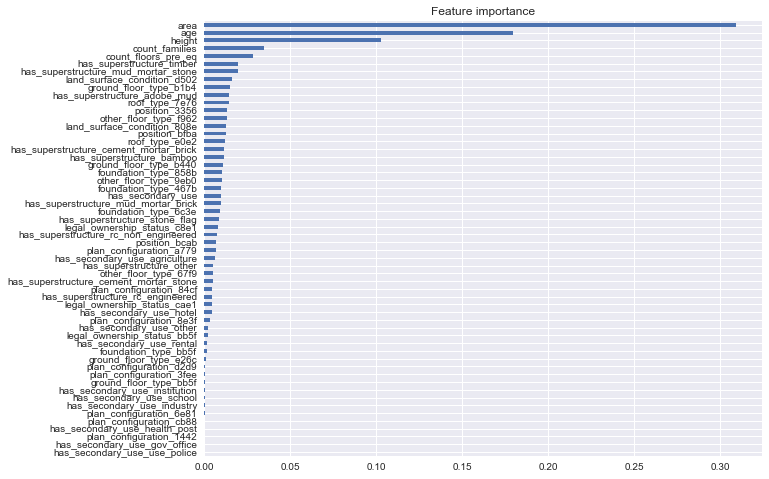

In [288]:
scaler=MinMaxScaler()
classifiers =  RandomForestClassifier(warm_start=True, oob_score=True,
                                      random_state=0,n_estimators=300)
scoring3 = make_scorer(f1_score,average='micro')
param=list()
method_names=['Decision Tree']
param.append({"clf__max_depth":[2,3,4,5]})
inner_fold = StratifiedKFold(random_state=0,n_splits=5)
outer_fold = StratifiedKFold(random_state=0,n_splits=5)
pipeline = Pipeline([('clf', classifiers)])
#random_search = RandomizedSearchCV(pipeline, n_iter=4, param_distributions=param[0],
#                                   cv = inner_fold,scoring=scoring3,random_state=0)
#cross_val_score(random_search, X, y, cv=outer_fold, scoring = scoring3)
fitted_rf=pipeline.fit(X,y)
feat_imp=pd.Series(fitted_rf.named_steps.clf.feature_importances_, index=X.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh', title='Feature importance')
end = time.time()
print('Execution Time in Minutes: {}'.format(round((end - start)/60,3)))

In [357]:
vars_to_keep=feat_imp.sort_values(ascending=False)[:20].index.values
X_subset=X.loc[:,vars_to_keep]

In [9]:
X2=X.drop(['count_floors_pre_eq','age','area','height','count_families'],axis=1)
X2=pd.concat([X2,num_trim.drop('damage_grade',axis=1)],axis=1)
X3=pd.concat([X,df.loc[:,["geo_level_1_id","geo_level_2_id","geo_level_3_id"]]],axis=1)
X4=pd.concat([X3,df['building_id']],axis=1)

#X2 has trimmed numeric variables
#X3 has geo_level_id's
#X4 has geo_level_id's AND building_id's

# Decision Tree Optimization

In [8]:
df=copy.deepcopy(features)
df['damage_grade']=labels['damage_grade']
numeric_outcome=df[['count_floors_pre_eq','age','area','height','count_families','damage_grade']]
num_trim=numeric_outcome.drop('damage_grade',axis=1)
num_trim['damage_grade']=labels['damage_grade']

## With feature selection

In [282]:
scaler=MinMaxScaler()
feature_selection=SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=0))
classifiers = DecisionTreeClassifier(random_state=0)
scoring3 = make_scorer(f1_score,average='micro')
param=list()
method_names=['Decision Tree']
param.append({"fselect__threshold":[1e-5,1e-4,1e-3], "clf__max_depth":[2,3,4,5]})
#param.append({"clf__max_depth":[2,3,4,5]})
inner_fold = StratifiedKFold(random_state=0,n_splits=5)
outer_fold = StratifiedKFold(random_state=0,n_splits=5)
pipeline = Pipeline([('fselect',feature_selection),('clf', classifiers)])
random_search = RandomizedSearchCV(pipeline, n_iter=5, param_distributions=param[0],
                                   cv = inner_fold,scoring=scoring3,random_state=0)
cross_val_score(random_search, X, y, cv=outer_fold, scoring = scoring3)
end = time.time()
print('Execution Time in Minutes: {}'.format(round((end - start)/60,3)))

array([ 0.56693307,  0.5865    ,  0.57      ,  0.55927964,  0.57228614])

Execution Time in Minutes: 25.301


## Without feature selection

With numerics having been outlier trimmed

In [353]:
scaler=MinMaxScaler()
classifiers = DecisionTreeClassifier(random_state=0)
scoring3 = make_scorer(f1_score,average='micro')
param=list()
method_names=['Decision Tree']
param.append({"clf__max_depth":[2,3,4,5]})
inner_fold = StratifiedKFold(random_state=0,n_splits=5)
outer_fold = StratifiedKFold(random_state=0,n_splits=5)
pipeline = Pipeline([('clf', classifiers)])
random_search = RandomizedSearchCV(pipeline, n_iter=4, param_distributions=param[0],
                                   cv = inner_fold,scoring=scoring3,random_state=0)
cross_val_score(random_search, X2, y, cv=outer_fold, scoring = scoring3)
end = time.time()
print('Execution Time in Minutes: {}'.format(round((end - start)/60,3)))

array([ 0.56443556,  0.5855    ,  0.5705    ,  0.56278139,  0.5827914 ])

Execution Time in Minutes: 91.54


With numerics not having been outlier trimmed

In [354]:
scaler=MinMaxScaler()
classifiers = DecisionTreeClassifier(random_state=0)
scoring3 = make_scorer(f1_score,average='micro')
param=list()
method_names=['Decision Tree']
param.append({"clf__max_depth":[2,3,4,5]})
inner_fold = StratifiedKFold(random_state=0,n_splits=5)
outer_fold = StratifiedKFold(random_state=0,n_splits=5)
pipeline = Pipeline([('clf', classifiers)])
random_search = RandomizedSearchCV(pipeline, n_iter=4, param_distributions=param[0],
                                   cv = inner_fold,scoring=scoring3,random_state=0)
cross_val_score(random_search, X, y, cv=outer_fold, scoring = scoring3)
end = time.time()
print('Execution Time in Minutes: {}'.format(round((end - start)/60,3)))

array([ 0.56443556,  0.5855    ,  0.5705    ,  0.56278139,  0.5847924 ])

Execution Time in Minutes: 92.026


# Decision Tree with geo_level ids and basic grid search

In [20]:
from sklearn.model_selection import GridSearchCV
scaler=MinMaxScaler()
classifiers = DecisionTreeClassifier(random_state=0)
scoring3 = make_scorer(f1_score,average='micro')
param=list()
method_names=['Decision Tree']
param={"clf__max_depth":[2,3,4,5]}


pipeline = Pipeline([('scaler', scaler),('clf', classifiers)])
grid = GridSearchCV(pipeline, param_grid=param,cv = 3,scoring=scoring3)
cross_validate(grid, X3, y, cv=outer_fold, scoring = scoring3)
end = time.time()
print('Execution Time in Seconds: {}'.format(round((end - start)/60,3)))


{'fit_time': array([ 0.52016115,  0.75928116,  0.49596024]),
 'score_time': array([ 0.00480509,  0.00470304,  0.00609279]),
 'test_score': array([ 0.63977205,  0.62327534,  0.63865546]),
 'train_score': array([ 0.64791479,  0.639964  ,  0.64832034])}

Execution Time in Minutes: 10.682


'\nparam= {     \n              "clf__criterion": ["gini", "entropy"],\n              "clf__min_samples_split": [2, 10, 20],\n              "clf__max_depth": [None, 2, 5, 10],\n              "clf__min_samples_leaf": [1, 5, 10],\n              "clf__max_leaf_nodes": [None, 5, 10, 20]\n        }\n'

# Decision Tree with geo level ids and advanced gridsearch

In [21]:
scaler=MinMaxScaler()
classifiers = DecisionTreeClassifier(random_state=0)
scoring3 = make_scorer(f1_score,average='micro')
param=list()
method_names=['Decision Tree']
param= {     
              "clf__criterion": ["gini", "entropy"],
              "clf__min_samples_split": [2, 10, 20],
              "clf__max_depth": [None, 2, 5, 10],
              "clf__min_samples_leaf": [1, 5, 10],
              "clf__max_leaf_nodes": [None, 5, 10, 20]
        }
pipeline = Pipeline([('scaler', scaler),('clf', classifiers)])
grid = GridSearchCV(pipeline, param_grid=param,cv = 3,scoring=scoring3)
cross_validate(grid, X3, y, cv=outer_fold, scoring = scoring3)
end = time.time()
print('Execution Time in Seconds: {}'.format(round((end - start)/60,3)))

{'fit_time': array([ 38.35244417,  34.19063902,  34.20563817]),
 'score_time': array([ 0.00644279,  0.00481701,  0.00587988]),
 'test_score': array([ 0.63797241,  0.63407319,  0.6467587 ]),
 'train_score': array([ 0.65811581,  0.65286529,  0.64637073])}

Execution Time in Minutes: 12.641


# Decision Tree including Building ID in the data

Makes little difference compared to adding geo_levels into the data

In [381]:
scaler=MinMaxScaler()
classifiers = DecisionTreeClassifier(random_state=0)
scoring3 = make_scorer(f1_score,average='micro')
param=list()
method_names=['Decision Tree']
param={"clf__max_depth":[2,3,4,5]}

pipeline = Pipeline([('scaler', scaler),('clf', classifiers)])
grid = GridSearchCV(pipeline, param_grid=param,cv = 3,scoring=scoring3)
cross_validate(grid, X4, y, cv=outer_fold, scoring = scoring3)
end = time.time()
print('Execution Time in Minutes: {}'.format(round((end - start)/60,3)))

{'fit_time': array([ 0.5256238 ,  0.48290396,  0.4734571 ,  0.47734308,  0.50201082]),
 'score_time': array([ 0.0030961 ,  0.00333118,  0.00346613,  0.00364685,  0.00306392]),
 'test_score': array([ 0.62837163,  0.6545    ,  0.6125    ,  0.62581291,  0.65232616]),
 'train_score': array([ 0.64203551,  0.644875  ,  0.6525    ,  0.64904387,  0.64441945])}

Execution Time in Minutes: 121.157


'\nparam= {     \n              "clf__criterion": ["gini", "entropy"],\n              "clf__min_samples_split": [2, 10, 20],\n              "clf__max_depth": [None, 2, 5, 10],\n              "clf__min_samples_leaf": [1, 5, 10],\n              "clf__max_leaf_nodes": [None, 5, 10, 20]\n        }\n'

# Using all models off data with geo level

In [14]:
classifiers = [
    DecisionTreeClassifier(random_state=0),
    LogisticRegression(random_state=0,multi_class='multinomial'),
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                      metric='minkowski', metric_params=None, n_jobs=1),
    RandomForestClassifier(warm_start=True, oob_score=True,random_state=0,n_estimators=300),
    AdaBoostClassifier(base_estimator=base, n_estimators = 100, random_state=0) ,
    GradientBoostingClassifier(random_state=0, max_features='sqrt')]

In [15]:
import time
start = time.time()
import warnings; warnings.simplefilter('ignore') # 'default' to restore warnings

cross_val_metrics=list()
metrics_accuracy_no_selection=list()

scoring = make_scorer(accuracy_score)
scoring3 = {'F1_Score': make_scorer(f1_score,average='micro')}

# parameters for gridsearch EXCLUDING feature selection threshold values
param2=list()
method_names=['Decision Tree','Logistic Regression', 'K Nearest Neighbors', 'Random Forests',
              'AdaBoost', 'Gradient Boosting Classifier','Naive Bayes']
param2.append({"clf__max_depth":[2,3,4,5]})
param2.append({'clf__C': [10**-4, 10**-2, 10**0, 10**2, 10**4],
              'clf__solver':["lbfgs", "sag", "newton-cg"]})
param2.append({'clf__alpha': [0,.3,.5,.7,1]})
param2.append({'clf__n_neighbors': [3,4,5,6,7]})
param2.append({'clf__max_features': ['sqrt',.2,.5,.8]})
param2.append({'clf__learning_rate': [.01,.1,1,2]})
param2.append({"clf__learning_rate": [.001,.01,.1]}) #, "clf__max_depth":[3,4,5]

for k in range(len(classifiers)):
    no_param=list()
    pipeline = Pipeline([('scaler', scaler), ('clf', classifiers[k])])
    for classifier in param2[k].values(): #set 1 = k (for each param grid)
        for param_values in classifier:  #for each param in param grid
            no_param.append(param_values) #append that param's values 
    no_param=len(no_param)
    random_search = RandomizedSearchCV(pipeline, n_iter=no_param, param_distributions=param2[k],cv = inner_fold,
                                                                scoring=scoring,random_state=0)
    cross_val_metrics.append((method_names[k],cross_validate(random_search, X3, y, cv=outer_fold, scoring = scoring3,
                                                            return_train_score=False)))
    print('Iteration {} Complete'.format(k))

for j in range(len(cross_val_metrics)):
    metrics1=list()
    metrics1.append(method_names[j])
    metrics1.append(np.mean(cross_val_metrics[j][1]['test_Accuracy']))
    metrics_accuracy_no_selection.append(metrics1)  
    
labels = ['Method','Accuracy']
classifier_metrics_accuracy_no_selection=pd.DataFrame.from_records(metrics_accuracy_no_selection,columns=labels)
classifier_metrics_accuracy_no_selection.sort_values('Accuracy',ascending=False)

end = time.time()
print('Execution Time in Minutes: {}'.format(round((end - start)/60,3)))

Iteration 0 Complete
Iteration 1 Complete
Iteration 2 Complete
Iteration 3 Complete
Iteration 4 Complete
Iteration 5 Complete
Iteration 6 Complete


KeyError: 'test_Accuracy'

From the below, it looks like Adaboost performs the best!

In [16]:
cross_val_metrics

[('Decision Tree',
  {'fit_time': array([ 0.46883368,  0.44505382,  0.40536499]),
   'score_time': array([ 0.0038321 ,  0.00449419,  0.00468993]),
   'test_F1_Score': array([ 0.63977205,  0.62327534,  0.63865546])}),
 ('Logistic Regression',
  {'fit_time': array([ 15.42963719,  12.81008911,  12.10134292]),
   'score_time': array([ 0.00335097,  0.01154995,  0.00439286]),
   'test_F1_Score': array([ 0.57678464,  0.58758248,  0.58433373])}),
 ('K Nearest Neighbors',
  {'fit_time': array([ 0.3533659 ,  0.36602402,  0.36680603]),
   'score_time': array([ 0.00440812,  0.00451088,  0.005265  ]),
   'test_F1_Score': array([ 0.56418716,  0.57708458,  0.56182473])}),
 ('Random Forests',
  {'fit_time': array([ 49.21562481,  51.94708085,  45.17231178]),
   'score_time': array([ 2.77892518,  2.46863413,  2.37684298]),
   'test_F1_Score': array([ 0.57528494,  0.56568686,  0.57292917])}),
 ('AdaBoost',
  {'fit_time': array([ 70.60145712,  72.93789506,  75.89449692]),
   'score_time': array([ 0.274224

Tuned decision tree hyperparameters!

In [33]:
best_params_dt

{'clf__criterion': 'entropy',
 'clf__max_depth': 10,
 'clf__max_leaf_nodes': None,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 20}

# Using Decision Tree hyperparameters that were already tuned and then doing a model evaluation with AdaBoost using this Decision Tree will cause the model to show inflated train scores, which makes sense. Test scores are as they were in the cross validation.

In [35]:
scaler=MinMaxScaler()
base=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=None,
      min_samples_leaf=1,min_samples_split=20,random_state=0)
classifiers = AdaBoostClassifier(base_estimator=base, n_estimators = 100, random_state=0)
param=list()
cross_val=list()
scoring3 = make_scorer(f1_score,average='micro')
param.append({'clf__learning_rate': [.01,.1,1,2]})
inner_fold = StratifiedKFold(random_state=0)
outer_fold = StratifiedKFold(random_state=0)
pipeline = Pipeline([('scaler', scaler),('clf', classifiers)])
grid = GridSearchCV(pipeline, param_grid=param, cv = 3,scoring=scoring3)
cross_validate(grid, X3, y, cv=outer_fold, scoring = scoring3)
end = time.time()
print('Execution Time in Seconds: {}'.format(round((end - start)/60,3)))

{'fit_time': array([ 49.00065207,  47.81822705,  47.8028512 ]),
 'score_time': array([ 0.08921909,  0.0894568 ,  0.08997989]),
 'test_score': array([ 0.64667067,  0.65386923,  0.64615846]),
 'train_score': array([ 0.89648965,  0.91929193,  0.89517097])}

Execution Time in Seconds: 25.065


# Using Decision Tree hyperparameters that were already tuned and then doing a model evaluation with these parameters will lead to inflated train scores, which makes sense.  Test scores are as they were in the cross validation.

In [38]:
scaler=MinMaxScaler()
base=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=None,
      min_samples_leaf=1,min_samples_split=20,random_state=0)
classifiers = base
param=list()
cross_val=list()
scoring3 = make_scorer(f1_score,average='micro')
param.append({'clf__learning_rate': [.01,.1,1,2]})
inner_fold = StratifiedKFold(random_state=0)
outer_fold = StratifiedKFold(random_state=0)
pipeline = Pipeline([('scaler', scaler),('clf', classifiers)])
#cross_val_score(pipeline,X3,y,cv=3)
#grid = GridSearchCV(pipeline, param_grid=param, cv = 3,scoring=scoring3)
cross_validate(pipeline, X3, y, cv=outer_fold, scoring = scoring3)
end = time.time()
print('Execution Time in Seconds: {}'.format(round((end - start)/60,3)))

{'fit_time': array([ 0.08141804,  0.075418  ,  0.06601191]),
 'score_time': array([ 0.02041912,  0.00537205,  0.00561404]),
 'test_score': array([ 0.64727055,  0.64307139,  0.63685474]),
 'train_score': array([ 0.71647165,  0.72352235,  0.71160768])}

Execution Time in Seconds: 31.189


# Hyperparameter Tuning for AdaBoost and it's Base Learner - A Decision Tree Stump

In [ ]:
X3_transformed=MinMaxScaler().fit_transform(X3)
X3_transformed=pd.DataFrame(X3_transformed,columns=X3.columns) #won't need pipeline

scaler=MinMaxScaler()
base = DecisionTreeClassifier(random_state = 0, class_weight = "balanced")
classifiers = AdaBoostClassifier(base_estimator=base, random_state=0)
scoring = make_scorer(f1_score,average='micro')
param= {      "base_estimator__max_features": ["auto","sqrt",20,40],
              "base_estimator__criterion": ["gini", "entropy"],
              "base_estimator__min_samples_split": [2, 10, 20],
              "base_estimator__max_depth": [None, 2, 5, 10],
              "base_estimator__min_samples_leaf": [1, 5, 10],
              "base_estimator__max_leaf_nodes": [None, 5, 10, 20],
              "learning_rate":[0.1, 0.01, 1, 10],
              "n_estimators": [50,100,150]
        }

grid = GridSearchCV(classifiers, param_grid=param,cv = 5,scoring=scoring)
grid.fit(X3_transformed,y)
#cross_validate(grid, X3, y, cv=outer_fold, scoring = scoring3)
end = time.time()
print('Execution Time in Seconds: {}'.format(round((end - start)/60,3)))

In [32]:
best_params_ada=grid.best_params_

# Train AdaBoost with Tuned Hyperparameters

In [ ]:
base = DecisionTreeClassifier(random_state = 0, class_weight = "balanced") #add tuned hypers
final_model = AdaBoostClassifier(base_estimator=base, random_state=0) #add tuned hypers
final_model.fit(X3_transformed)

In [ ]:
test_features = pd.read_csv('/Users/Work/Desktop/Work/Projects/Microsoft Capstone/Microsoft_-_DAT102x_Predicting_Earthquake_Damage_in_Nepal_-_Test_values.csv')

In [135]:
#get categoricals
#get poly categoricals that need to be one-hot encoded
#drop polys with too many categoricals (geo_levels)
#one-hot encode remaining polys
#make table of original table but with vars that were one hot encoded dropped
#add back in one-hot encoded polys
#drop polys with too many categoricals and building id

test_categoricals=test_features.drop(["count_floors_pre_eq", "age", "area", "height", 
               "count_families","building_id"],axis=1)
test_poly_categoricals=test_categoricals.loc[:,["geo_level_1_id","geo_level_2_id","geo_level_3_id",
                   "land_surface_condition","foundation_type","roof_type",
                   "ground_floor_type","other_floor_type", "position",
                   "plan_configuration","legal_ownership_status"]]
test_poly_categoricals2=test_poly_categoricals.drop(["geo_level_1_id","geo_level_2_id",
                   "geo_level_3_id"],axis=1) 
test_dummies=pd.get_dummies(test_poly_categoricals2,drop_first=True)
X_test=test_features.drop(["land_surface_condition","foundation_type","roof_type",
                   "ground_floor_type","other_floor_type", "position",
                   "plan_configuration","legal_ownership_status"],axis=1)
X_test=pd.concat([X_test,test_dummies],axis=1)
X_test=X_test.drop(["geo_level_1_id", "geo_level_2_id", "geo_level_3_id"],axis=1)
X_test=X_test.drop(['building_id'],axis=1)

In [188]:
predictions=final_pipeline.predict(X_test)
predictions=pd.Series(predictions,index=test_features['building_id'])
predictions=predictions.reset_index()
predictions.columns=['building_id','damage_grade']
submission=pd.concat([test_features['building_id'],predictions['damage_grade']],axis=1)
submission=submission.set_index('building_id')

In [191]:
submission.to_csv('/Users/Work/Desktop/Work/Projects/Microsoft Capstone/submission.csv')

# Additional Modeling Attempts

# 3-Fold CV - no Feature Scaling or Feature Selection

In [194]:
import time
start = time.time()
import warnings; warnings.simplefilter('ignore') # 'default' to restore warnings

cross_val_metrics=list()
metrics_accuracy_other=list()

scoring = make_scorer(accuracy_score)
scoring2 = {'Accuracy': make_scorer(accuracy_score)}

# parameters for gridsearch EXCLUDING feature selection threshold values
param2=list()
method_names=['Decision Tree','Logistic Regression', 'K Nearest Neighbors', 'Random Forests',
             'Support Vector Machines', 'AdaBoost', 'Gradient Boosting Classifier','Naive Bayes']
param2.append({"clf__max_depth":[2,3,4,5]})
param2.append({'clf__C': [10**-4, 10**-2, 10**0, 10**2, 10**4],
              'clf__solver':["lbfgs", "sag", "newton-cg"]})
param2.append({'clf__alpha': [0,.3,.5,.7,1]})
param2.append({'clf__n_neighbors': [3,4,5,6,7]})
param2.append({'clf__max_features': ['sqrt',.2,.5,.8]})
param2.append({'clf__C': [.001, .01, .1, 1, 10], "clf__gamma": [.001, .01, .1, 1]})
param2.append({'clf__learning_rate': [.01,.1,1,2]})
param2.append({"clf__learning_rate": [.001,.01,.1], "clf__max_depth":[3,4,5]})

for k in range(len(classifiers)):
    no_param=list()
    pipeline = Pipeline([('clf', classifiers[k])])
    for classifier in param2[k].values(): #set 1 = k (for each param grid)
        for param_values in classifier:  #for each param in param grid
            no_param.append(param_values) #append that param's values 
    no_param=len(no_param)
    random_search = RandomizedSearchCV(pipeline, n_iter=no_param, param_distributions=param2[k],cv = inner_fold,
                                                                scoring=scoring,random_state=0)
    cross_val_metrics.append((method_names[k],cross_validate(random_search, X_sub, y_sub, cv=outer_fold, scoring = scoring2,
                                                            return_train_score=False)))
    print('Iteration {} Complete'.format(k))

for j in range(len(cross_val_metrics)):
    metrics1=list()
    metrics1.append(method_names[j])
    metrics1.append(np.mean(cross_val_metrics[j][1]['test_Accuracy']))
    metrics_accuracy_other.append(metrics1)  
    
labels = ['Method','Accuracy']
classifier_metrics_accuracy_other=pd.DataFrame.from_records(metrics_accuracy_other,columns=labels)
classifier_metrics_accuracy_other.sort_values('Accuracy',ascending=False)


end = time.time()
print('Execution Time in Minutes: {}'.format(round((end - start)/60,3)))

Iteration 0 Complete
Iteration 1 Complete
Iteration 2 Complete
Iteration 3 Complete
Iteration 4 Complete
Iteration 5 Complete
Iteration 6 Complete
Iteration 7 Complete


,Method,Accuracy
1,Logistic Regression,0.540
7,Naive Bayes,0.530
6,Gradient Boosting Classifier,0.529
5,AdaBoost,0.488
4,Support Vector Machines,0.488
3,Random Forests,0.480
0,Decision Tree,0.458
2,K Nearest Neighbors,0.450


Execution Time in Minutes: 0.724


# Stacking - Simple Stacked Classification with 24 probabilities as Meta-Features

The below implements a simple stacked classification method where the outputs of the classifiers are fed to another classifier, what is called the "meta-classifier", which then outputs the final predictions.  The inputs to the meta-classifier can be labels or  probabilities and are called "meta-features". <br>

I have them as probabilities, below, by setting use_probas=1 within the StackingClassifier function.  Also, average_probas=False, which means that there aren't just 3 meta-features (the average of each probability across all classifiers for each label).  There are k = [n_classes * n_classifiers] = (3 * 8) = 24 features. <br>

I could not figure out how to implement a pipeline with gridearch using this stacking classification method, so I excluded the pipeline, meaning I did not scale feature values. <br>

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/#example-2-using-probabilities-as-meta-features

In [11]:
from mlxtend.classifier import StackingClassifier
cross_val_metrics=list()
metrics_accuracy_no_selection=list()

#scoring = {'Accuracy': make_scorer(accuracy_score)}
scoring = make_scorer(accuracy_score)

In [473]:
#specifying solver='lbfgs' for logisticregression
classifiers = [
    DecisionTreeClassifier(random_state=0),
    LogisticRegression(random_state=0,multi_class='multinomial',solver="lbfgs"),
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                      metric='minkowski', metric_params=None, n_jobs=1),
    RandomForestClassifier(warm_start=True, oob_score=True,random_state=0,n_estimators=300),
    svm.SVC(random_state=0,probability=True), 
    AdaBoostClassifier(base_estimator=base, n_estimators = 100, random_state=0) ,
    GradientBoostingClassifier(random_state=0, max_features='sqrt')
]

In [424]:
ab= AdaBoostClassifier(base_estimator=base, n_estimators = 100, random_state=0) 
lr= LogisticRegression(random_state=0,multi_class='multinomial',solver= 'lbfgs')
sclf = StackingClassifier(classifiers=classifiers, meta_classifier=ab)

In [528]:
stack_params= {
         'decisiontreeclassifier__max_depth':[2,3,4,5],
         'logisticregression__C':[10**-4, 10**-2, 10**0, 10**2, 10**4],
         'multinomialnb__alpha':[0,.3,.5,.7,1],
         'kneighborsclassifier__n_neighbors': [3,4,5,6,7],
         'randomforestclassifier__max_features': ['sqrt',.2,.5,.8],
         'svc__C':[.001, .01, .1, 1, 10],
         'adaboostclassifier__learning_rate':[.01,.1,1,2],
         'gradientboostingclassifier__learning_rate':[.001,.01,.1],
         'meta-adaboostclassifier__learning_rate': [.01,.1,1,2]}
        # 'meta-logisticregression__C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}

sclf = StackingClassifier(classifiers=classifiers, meta_classifier=ab, use_probas=1)
#clf = RandomizedSearchCV(sclf, n_iter=20, param_distributions=stack_params,
#                         cv = inner_fold, scoring=scoring,random_state=0)

random_search = RandomizedSearchCV(estimator=sclf, param_distributions=stack_params,
                            refit=True, n_iter = 40, verbose=1, n_jobs=-1)
random_search.fit(X_sub, y_sub)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.0min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=StackingClassifier(average_probas=False,
          classifiers=[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, mi...store_train_meta_features=False,
          use_features_in_secondary=False, use_probas=1, verbose=0),
          fit_params=None, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'decisiontreeclassifier__max_depth': [2, 3, 4, 5], 'logisticregression__C': [0.0001, 0.01, 1, 100, 10000], 'multinomialnb__alpha': [0, 0.3, 0.5, 0.7, 1], 'kneighborsclassifier__n_neighbors': [3, 4, 5, 6, 7], 'randomforestclassifier__max_features': ['sqrt', 0.2, 0.5, 0.8], 'svc__...er__learning_rate': [0.001, 0.01, 0.1], 'meta-adaboostclassifier__learning_rate': [0.01, 0.1, 1, 2]},
          pre_dispatch='2*n_jobs', random_state=None, refit=Tr

In [531]:
cross_val_score(random_search, X_sub, y_sub)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   58.6s finished


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   57.4s finished


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.0min finished


array([ 0.52941176,  0.58823529,  0.40625   ])

In [534]:
np.mean([0.52941176,0.58823529,0.40625])

0.50796568333333336

# Majority Vote Ensemble Classifier w/o feature scaling

Taking the majority vote of the predicted labels from each classifier. Excludes feature scaling.

In [566]:
from sklearn.ensemble import VotingClassifier

In [579]:
classifiers = [DecisionTreeClassifier(random_state=0),
    LogisticRegression(random_state=0,multi_class='multinomial',solver="lbfgs"),
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                      metric='minkowski', metric_params=None, n_jobs=1),
    RandomForestClassifier(warm_start=True, oob_score=True,random_state=0,n_estimators=300),
    svm.SVC(random_state=0,probability=True), 
    AdaBoostClassifier(base_estimator=base, n_estimators = 100, random_state=0) ,
    GradientBoostingClassifier(random_state=0, max_features='sqrt')]
 
clf1=classifiers[0]
clf2=classifiers[1]
clf3=classifiers[2]
clf4=classifiers[3]
clf5=classifiers[4]
clf6=classifiers[5]
clf7=classifiers[6]
clf8=classifiers[7]


eclf1 = VotingClassifier(estimators=[
    ('dt', clf1), ('lr', clf2), ('nm', clf3),('knn',clf4),('rf',clf5),('svc',clf6),
    ('ada',clf7),('gbc',clf8)],voting='hard')

eclf_params= {
         'dt__max_depth':[2,3,4,5],
         'lr__C':[10**-4, 10**-2, 10**0, 10**2, 10**4],
         'nm__alpha':[0,.3,.5,.7,1],
         'knn__n_neighbors': [3,4,5,6,7],
         'rf__max_features': ['sqrt',.2,.5,.8],
         'svc__C':[.001, .01, .1, 1, 10],
         'ada__learning_rate':[.01,.1,1,2],
         'gbc__learning_rate':[.001,.01,.1]
}
random_search = RandomizedSearchCV(estimator=eclf1, param_distributions=eclf_params,
                            refit=True, n_iter = 40, verbose=1, n_jobs=-1)
np.mean(cross_val_score(random_search, X_sub, y_sub))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   52.7s finished


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   57.0s finished


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   52.8s finished


0.4889705882352941

# Majority Vote Ensemble Classifier with feature scaling

In [ ]:
classifiers = [DecisionTreeClassifier(random_state=0),
    LogisticRegression(random_state=0,multi_class='multinomial',solver="lbfgs"),
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                      metric='minkowski', metric_params=None, n_jobs=1),
    RandomForestClassifier(warm_start=True, oob_score=True,random_state=0,n_estimators=300),
    svm.SVC(random_state=0,probability=True), 
    AdaBoostClassifier(base_estimator=base, n_estimators = 100, random_state=0) ,
    GradientBoostingClassifier(random_state=0, max_features='sqrt')]
 
clf1=classifiers[0]
clf2=classifiers[1]
clf3=classifiers[2]
clf4=classifiers[3]
clf5=classifiers[4]
clf6=classifiers[5]
clf7=classifiers[6]
clf8=classifiers[7]

eclf2 = VotingClassifier(estimators=[
('p1',p1),('p2',p2),('p3',p3),('p4',p4),('p5',p5),('p6',p6),('p7',p7),('p8',p8)])

random_search = RandomizedSearchCV(estimator=eclf2, param_distributions=eclf_params,
                            refit=True, n_iter = 40, verbose=1, n_jobs=-1)
np.mean(cross_val_score(random_search, X_sub, y_sub))

In [ ]:
eclf2 = VotingClassifier(estimators=[
    ('dt', clf1), ('lr', clf2), ('nm', clf3),('knn',clf4),('rf',clf5),('svc',clf6),
    ('ada',clf7),('gbc',clf8)],voting='hard')

eclf_params= {
         'pipeline_dt__max_depth':[2,3,4,5],
         'pipeline_lr__C':[10**-4, 10**-2, 10**0, 10**2, 10**4],
         'pipeline_nm__alpha':[0,.3,.5,.7,1],
         'pipeline_knn__n_neighbors': [3,4,5,6,7],
         'pipeline_rf__max_features': ['sqrt',.2,.5,.8],
         'pipeline_svc__C':[.001, .01, .1, 1, 10],
         'pipeline_ada__learning_rate':[.01,.1,1,2],
         'pipeline_gbc__learning_rate':[.001,.01,.1]}

pipeline = Pipeline([('scaler',scaler),('eclf',eclf2)])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=eclf_params,
                            refit=True, n_iter = 40, verbose=1, n_jobs=-1)
np.mean(cross_val_score(random_search, X_sub, y_sub))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


# Multi-Layer Stacked Classification with feature propagation (ATTEMPT)

Propagating input space into each layer, so that models are built off original features and previous layer model probabilities. <br>
http://ml-ensemble.com/info/tutorials/advanced.html#propagating-input-features

In [18]:
from mlens.ensemble import SuperLearner
classifiers = [DecisionTreeClassifier(random_state=0),
    LogisticRegression(random_state=0,multi_class='multinomial',solver="lbfgs"),
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                      metric='minkowski', metric_params=None, n_jobs=1),
    RandomForestClassifier(warm_start=True, oob_score=True,random_state=0,n_estimators=300),
    svm.SVC(random_state=0,probability=True), 
    AdaBoostClassifier(base_estimator=base, n_estimators = 100, random_state=0) ,
    GradientBoostingClassifier(random_state=0, max_features='sqrt')]
 
clf1=classifiers[0]
clf2=classifiers[1]
clf3=classifiers[2]
clf4=classifiers[3]
clf5=classifiers[4]
clf6=classifiers[5]
clf7=classifiers[6]
clf8=classifiers[7]
clf1_2=classifiers[0]
clf2_2=classifiers[1]
clf6_2=classifiers[6]

ensemble = SuperLearner(scorer=accuracy_score, random_state=0, verbose=2)
ensemble.add([clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8],
             propagate_features=range(len(X.columns))) #layer 1
ensemble.add([clf1_2,clf2_2,clf6_2],propagate_features=range(len(X.columns))) #layer 2
ensemble.add([clf1_2,clf2_2,clf6_2],propagate_features=range(len(X.columns))) #layer 3
ensemble.add_meta(LogisticRegression(random_state=0,multi_class='multinomial',solver= 'lbfgs'),
                 propagate_features=range(len(X.columns)))

SuperLearner(array_check=2, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=range(0, 64),
   raise_on_exception=True, random_state=0, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_...73e2048>)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=0, sample_size=20,
       scorer=<function accuracy_score at 0x1173e2048>, shuffle=False,
       verbose=2)

SuperLearner(array_check=2, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=range(0, 64),
   raise_on_exception=True, random_state=0, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_...73e2048>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=0, sample_size=20,
       scorer=<function accuracy_score at 0x1173e2048>, shuffle=False,
       verbose=2)

SuperLearner(array_check=2, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=range(0, 64),
   raise_on_exception=True, random_state=0, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_...73e2048>)],
   n_jobs=-1, name='group-2', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=0, sample_size=20,
       scorer=<function accuracy_score at 0x1173e2048>, shuffle=False,
       verbose=2)

SuperLearner(array_check=2, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=range(0, 64),
   raise_on_exception=True, random_state=0, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_...73e2048>)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=0, sample_size=20,
       scorer=<function accuracy_score at 0x1173e2048>, shuffle=False,
       verbose=2)

In [ ]:
random_search = RandomizedSearchCV(estimator=ensemble, param_distributions=eclf_params,
                            refit=True, n_iter = 40, verbose=1, n_jobs=-1)
np.mean(cross_val_score(random_search, X_sub, y_sub))

In [267]:
import time
start = time.time()
import warnings; warnings.simplefilter('ignore') # 'default' to restore warnings
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
accuracy_scorer = make_scorer(accuracy_score, greater_is_better=True)
pars1={'dt__max_depth':[2,3,4,5]}
pars2={'lr__C':[10**-4, 10**-2, 10**0, 10**2, 10**4]}
pars3={'nm__alpha':[0,.3,.5,.7,1]}
pars4={'knn__n_neighbors': [3,4,5,6,7]}
pars5={'rf__max_features': ['sqrt',.2,.5,.8]}
pars6={'svc__C':[.001, .01, .1, 1, 10]}
pars7={'ada__learning_rate':[.01,.1,1,2]}
pars8={'gbc__learning_rate':[.001,.01,.1]}
params={'dt':pars1, 'lr':pars2, 'nm':pars3,'knn':pars4,'rf':pars5,'svc':pars6,
        'ada':pars7,'gbc':pars8}
evaluator = Evaluator(accuracy_scorer, cv=10, random_state=0, verbose=1)
evaluator.fit(X_sub, y_sub, ensemble, params, n_iter=10)
end = time.time()

Launching job

Fitting 4 layers

Fitting 4 layers
Fitting 4 layers
Fitting 4 layers


Processing layer-1             Processing layer-1             Processing layer-1             Processing layer-1             
Fitting 4 layers
Processing layer-1             

JoblibException: JoblibException
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10c831ed0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/Work/anaconda/envs/python3/lib/python3.6/...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/Work/.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10c831ed0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/Work/anaconda/envs/python3/lib/python3.6/...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/Work/.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'import time\nstart = time.time()\nimport warnings;...b, ensemble, params, n_iter=10)\nend = time.time()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 24, 19, 1, 17, 165381, tzinfo=datetime.timezone.utc), 'msg_id': '6F15679279FA435395C94246122FC200', 'msg_type': 'execute_request', 'session': 'C1E630918CDD48719BB53BD1A93BC28C', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '6F15679279FA435395C94246122FC200', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.warn("Unknown message type: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'C1E630918CDD48719BB53BD1A93BC28C']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'import time\nstart = time.time()\nimport warnings;...b, ensemble, params, n_iter=10)\nend = time.time()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 24, 19, 1, 17, 165381, tzinfo=datetime.timezone.utc), 'msg_id': '6F15679279FA435395C94246122FC200', 'msg_type': 'execute_request', 'session': 'C1E630918CDD48719BB53BD1A93BC28C', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '6F15679279FA435395C94246122FC200', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'C1E630918CDD48719BB53BD1A93BC28C'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'import time\nstart = time.time()\nimport warnings;...b, ensemble, params, n_iter=10)\nend = time.time()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 24, 19, 1, 17, 165381, tzinfo=datetime.timezone.utc), 'msg_id': '6F15679279FA435395C94246122FC200', 'msg_type': 'execute_request', 'session': 'C1E630918CDD48719BB53BD1A93BC28C', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '6F15679279FA435395C94246122FC200', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='import time\nstart = time.time()\nimport warnings;...b, ensemble, params, n_iter=10)\nend = time.time()', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'import time\nstart = time.time()\nimport warnings;...b, ensemble, params, n_iter=10)\nend = time.time()'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('import time\nstart = time.time()\nimport warnings;...b, ensemble, params, n_iter=10)\nend = time.time()',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('import time\nstart = time.time()\nimport warnings;...b, ensemble, params, n_iter=10)\nend = time.time()',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipython-5.3.0-py3.6.egg/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='import time\nstart = time.time()\nimport warnings;...b, ensemble, params, n_iter=10)\nend = time.time()', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'all'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipython-5.3.0-py3.6.egg/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Import object>, <_ast.Assign object>, <_ast.Import object>, <_ast.Expr object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>], cell_name='<ipython-input-267-79a0c12497ab>', interactivity='all', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 11ed7c278, execution_..._before_exec=None error_in_exec=None result=None>)
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])
   2826                 code = compiler(mod, cell_name, "single")
-> 2827                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x11ea12300, file "<ipython-input-267-79a0c12497ab>", line 18>
        result = <ExecutionResult object at 11ed7c278, execution_..._before_exec=None error_in_exec=None result=None>
   2828                     return True
   2829 
   2830             # Flush softspace
   2831             if softspace(sys.stdout, 0):

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipython-5.3.0-py3.6.egg/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x11ea12300, file "<ipython-input-267-79a0c12497ab>", line 18>, result=<ExecutionResult object at 11ed7c278, execution_..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x11ea12300, file "<ipython-input-267-79a0c12497ab>", line 18>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'DataFrame': <class 'pandas.core.frame.DataFrame'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'Evaluator': <class 'mlens.model_selection.model_selection.Evaluator'>, 'ExcelWriter': <class 'pandas.io.excel.ExcelWriter'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', "import os\nimport pandas as pd\nfrom pandas import...ated in the following directory: \\n'+os.getcwd())", "features = pd.read_csv('/Users/Work/Desktop/Work...arthquake_Damage_in_Nepal_-_Training_labels.csv')", "df=copy.deepcopy(features)\ndf['damage_grade']=la... \nnum_trim['damage_grade']=labels['damage_grade']", "num_trim_rename=copy.deepcopy(num_trim)\nnum_trim...sktop/Work/Projects/Microsoft Capstone/data.csv')", 'categoricals=features.drop(["count_floors_pre_eq...          "count_families","building_id"],axis=1)', 'poly_categoricals=categoricals.loc[:,["geo_level... #these categoricals have too many levels to show', "from mlens.visualization import corrmat\ncorrmat(numeric_outcome.drop('damage_grade',axis=1).corr())", "cat_corrs=df[['ground_floor_type', 'foundation_t...)\ncat_outcome['damage_grade']=labels.damage_grade", "dummies=pd.get_dummies(poly_categoricals2)\ndf2=d...ade','building_id'],axis=1)\ny=df2['damage_grade']", "scaler=MinMaxScaler()\nbase=DecisionTreeClassifie...00)\ncolors=['b','g','r','y','k','c','m','orange']", 'from mlxtend.classifier import StackingClassifie...acy_score)}\nscoring = make_scorer(accuracy_score)', 'from mlens.ensemble import SuperLearner', 'import time\nstart = time.time()\nimport warnings;...t Evaluator\nfrom mlens.metrics import make_scorer', 'import time\nstart = time.time()\nimport warnings;...y_sub, ests, params, n_iter=10)\nend = time.time()', '#Work off a subset of the data for the purposes of testing\nX_sub=X[:100]\ny_sub=y[:100]', 'import time\nstart = time.time()\nimport warnings;...y_sub, ests, params, n_iter=10)\nend = time.time()', 'ensemble', 'from mlens.ensemble import SuperLearner\nclassifi...        propagate_features=range(len(X.columns)))', 'ensemble', ...], 'InteractiveShell': <class 'IPython.core.interactiveshell.InteractiveShell'>, ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'DataFrame': <class 'pandas.core.frame.DataFrame'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'Evaluator': <class 'mlens.model_selection.model_selection.Evaluator'>, 'ExcelWriter': <class 'pandas.io.excel.ExcelWriter'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', "import os\nimport pandas as pd\nfrom pandas import...ated in the following directory: \\n'+os.getcwd())", "features = pd.read_csv('/Users/Work/Desktop/Work...arthquake_Damage_in_Nepal_-_Training_labels.csv')", "df=copy.deepcopy(features)\ndf['damage_grade']=la... \nnum_trim['damage_grade']=labels['damage_grade']", "num_trim_rename=copy.deepcopy(num_trim)\nnum_trim...sktop/Work/Projects/Microsoft Capstone/data.csv')", 'categoricals=features.drop(["count_floors_pre_eq...          "count_families","building_id"],axis=1)', 'poly_categoricals=categoricals.loc[:,["geo_level... #these categoricals have too many levels to show', "from mlens.visualization import corrmat\ncorrmat(numeric_outcome.drop('damage_grade',axis=1).corr())", "cat_corrs=df[['ground_floor_type', 'foundation_t...)\ncat_outcome['damage_grade']=labels.damage_grade", "dummies=pd.get_dummies(poly_categoricals2)\ndf2=d...ade','building_id'],axis=1)\ny=df2['damage_grade']", "scaler=MinMaxScaler()\nbase=DecisionTreeClassifie...00)\ncolors=['b','g','r','y','k','c','m','orange']", 'from mlxtend.classifier import StackingClassifie...acy_score)}\nscoring = make_scorer(accuracy_score)', 'from mlens.ensemble import SuperLearner', 'import time\nstart = time.time()\nimport warnings;...t Evaluator\nfrom mlens.metrics import make_scorer', 'import time\nstart = time.time()\nimport warnings;...y_sub, ests, params, n_iter=10)\nend = time.time()', '#Work off a subset of the data for the purposes of testing\nX_sub=X[:100]\ny_sub=y[:100]', 'import time\nstart = time.time()\nimport warnings;...y_sub, ests, params, n_iter=10)\nend = time.time()', 'ensemble', 'from mlens.ensemble import SuperLearner\nclassifi...        propagate_features=range(len(X.columns)))', 'ensemble', ...], 'InteractiveShell': <class 'IPython.core.interactiveshell.InteractiveShell'>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/Users/Work/Desktop/Work/Projects/Microsoft Capstone/<ipython-input-267-79a0c12497ab> in <module>()
     13 pars7={'ada__learning_rate':[.01,.1,1,2]}
     14 pars8={'gbc__learning_rate':[.001,.01,.1]}
     15 params={'dt':pars1, 'lr':pars2, 'nm':pars3,'knn':pars4,'rf':pars5,'svc':pars6,
     16         'ada':pars7,'gbc':pars8}
     17 evaluator = Evaluator(accuracy_scorer, cv=10, random_state=0, verbose=1)
---> 18 evaluator.fit(X_sub, y_sub, ensemble, params, n_iter=10)
     19 end = time.time()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/model_selection/model_selection.py in fit(self=<mlens.model_selection.model_selection.Evaluator object>, X=    count_floors_pre_eq  age  area  height  has_...                     0  

[100 rows x 64 columns], y=0     2
1     3
2     2
3     2
4     3
5     2
...
98    3
99    2
Name: damage_grade, dtype: int64, estimators=SuperLearner(array_check=2, backend=None, folds=...at 0x1173e2048>, shuffle=False,
       verbose=2), param_dicts={'ada': {'ada__learning_rate': [0.01, 0.1, 1, 2]}, 'dt': {'dt__max_depth': [2, 3, 4, 5]}, 'gbc': {'gbc__learning_rate': [0.001, 0.01, 0.1]}, 'knn': {'knn__n_neighbors': [3, 4, 5, 6, 7]}, 'lr': {'lr__C': [0.0001, 0.01, 1, 100, 10000]}, 'nm': {'nm__alpha': [0, 0.3, 0.5, 0.7, 1]}, 'rf': {'rf__max_features': ['sqrt', 0.2, 0.5, 0.8]}, 'svc': {'svc__C': [0.001, 0.01, 0.1, 1, 10]}}, n_iter=10, preprocessing=None)
    502             class instance with stored estimator evaluation results in
    503             the ``results`` attribute.
    504         """
    505         job = set_job(estimators, preprocessing)
    506         self._initialize(job, estimators, preprocessing, param_dicts, n_iter)
--> 507         self._fit(X, y, job)
        self._fit = <bound method BaseEval._fit of <mlens.model_selection.model_selection.Evaluator object>>
        X =     count_floors_pre_eq  age  area  height  has_...                     0  

[100 rows x 64 columns]
        y = 0     2
1     3
2     2
3     2
4     3
5     2
...
98    3
99    2
Name: damage_grade, dtype: int64
        job = 'evaluate'
    508         self._get_results()
    509         return self
    510 
    511     def _initialize(self, job, estimators, preprocessing, param_dicts, n_iter):

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/model_selection/model_selection.py in _fit(self=<mlens.model_selection.model_selection.Evaluator object>, X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), y=array([2, 3, ..., 3, 2]), job='evaluate')
    175 
    176     def _fit(self, X, y, job):
    177         X, y = check_inputs(X, y, self.array_check)
    178         verbose = max(self.verbose - 2, 0) if self.verbose < 15 else 0
    179         with ParallelEvaluation(self.backend, self.n_jobs, verbose) as manager:
--> 180             manager.process(self, job, X, y)
        manager.process = <bound method ParallelEvaluation.process of <mlens.parallel.backend.ParallelEvaluation object>>
        self = <mlens.model_selection.model_selection.Evaluator object>
        job = 'evaluate'
        X = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]])
        y = array([2, 3, ..., 3, 2])
    181 
    182     def collect(self, path, case):
    183         """Collect cache estimators"""
    184         if case == 'transformers':

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in process(self=<mlens.parallel.backend.ParallelEvaluation object>, caller=<mlens.model_selection.model_selection.Evaluator object>, case='evaluate', X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), y=array([2, 3, ..., 3, 2]), path=None, **kwargs={})
    851         with Parallel(n_jobs=self.n_jobs, temp_folder=tf, max_nbytes=None,
    852                       mmap_mode='w+', verbose=self.verbose,
    853                       backend=self.backend) as parallel:
    854 
    855             caller.indexer.fit(self.job.predict_in, self.job.targets, self.job.job)
--> 856             caller(parallel, self.job.args(**kwargs), case)
        caller = <mlens.model_selection.model_selection.Evaluator object>
        parallel = Parallel(n_jobs=-1)
        self.job.args = <bound method Job.args of <mlens.parallel.backend.Job object>>
        kwargs = {}
        case = 'evaluate'

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/model_selection/model_selection.py in __call__(self=<mlens.model_selection.model_selection.Evaluator object>, parallel=Parallel(n_jobs=-1), args={'auxiliary': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}, 'dir': [], 'job': 'fit', 'main': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}}, case='evaluate')
    147         if 'evaluate' in case:
    148             if self.verbose >= 2:
    149                 safe_print(self._print_eval_start(), file=f)
    150                 t1 = time()
    151 
--> 152             self._run('estimators', parallel, args)
        self._run = <bound method BaseEval._run of <mlens.model_selection.model_selection.Evaluator object>>
        parallel = Parallel(n_jobs=-1)
        args = {'auxiliary': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}, 'dir': [], 'job': 'fit', 'main': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}}
    153             self.collect(args['dir'], 'estimators')
    154 
    155             if self.verbose >= 2:
    156                 print_time(t1, '{:<13} done'.format('Evaluation'), file=f)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/model_selection/model_selection.py in _run(self=<mlens.model_selection.model_selection.Evaluator object>, case='estimators', parallel=Parallel(n_jobs=-1), args={'auxiliary': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}, 'dir': [], 'job': 'fit', 'main': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}})
    169         else:
    170             generator = self._learners
    171             inp = 'main'
    172 
    173         parallel(delayed(subtask, not _threading)()
--> 174                  for task in generator for subtask in task(args, inp))
        generator = [EvalLearner(attr='predict', backend='threading',...rer=make_scorer(accuracy_score),
      verbose=0)]
        args = {'auxiliary': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}, 'dir': [], 'job': 'fit', 'main': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}}
    175 
    176     def _fit(self, X, y, job):
    177         X, y = check_inputs(X, y, self.array_check)
    178         verbose = max(self.verbose - 2, 0) if self.verbose < 15 else 0

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseEval._run.<locals>.<genexpr>>)
    788             if pre_dispatch == "all" or n_jobs == 1:
    789                 # The iterable was consumed all at once by the above for loop.
    790                 # No need to wait for async callbacks to trigger to
    791                 # consumption.
    792                 self._iterating = False
--> 793             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    794             # Make sure that we get a last message telling us we are done
    795             elapsed_time = time.time() - self._start_time
    796             self._print('Done %3i out of %3i | elapsed: %s finished',
    797                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
JoblibIndexError                                   Tue Apr 24 15:01:29 2018
PID: 9943       Python 3.6.1: /Users/Work/anaconda/envs/python3/bin/python3
...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in __call__(self=<mlens.externals.joblib.parallel.BatchedCalls object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<mlens.parallel.learner.EvalSubLearner object>, (), {})]
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <mlens.parallel.learner.EvalSubLearner object>
        args = ()
        kwargs = {}
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in __call__(self=<mlens.parallel.learner.EvalSubLearner object>)
    120         else:
    121             self.processing_index = ''
    122 
    123     def __call__(self):
    124         """Launch job"""
--> 125         return getattr(self, self.job)()
        self = <mlens.parallel.learner.EvalSubLearner object>
        self.job = 'fit'
    126 
    127     def fit(self, path=None):
    128         """Fit sub-learner"""
    129         if path is None:

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in fit(self=<mlens.parallel.learner.EvalSubLearner object>, path=[])
    332         path = path if path else self.path
    333         if self.scorer is None:
    334             raise ValueError("Cannot generate CV-scores without a scorer")
    335         t0 = time()
    336         transformers = self._load_preprocess(path)
--> 337         self._fit(transformers)
        self._fit = <bound method SubLearner._fit of <mlens.parallel.learner.EvalSubLearner object>>
        transformers = None
    338         self._predict(transformers)
    339 
    340         o = IndexedEstimator(estimator=self.estimator,
    341                              name=self.name_index,

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in _fit(self=<mlens.parallel.learner.EvalSubLearner object>, transformers=None)
    175         t0 = time()
    176         if transformers:
    177             xtemp, ytemp = transformers.transform(xtemp, ytemp)
    178 
    179         # Fit estimator
--> 180         self.estimator.fit(xtemp, ytemp)
        self.estimator.fit = <bound method BaseEnsemble.fit of SuperLearner(a...t 0x1173e2048>, shuffle=False,
       verbose=2)>
        xtemp = array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]])
        ytemp = array([2, 2, ..., 3, 2])
    181         self.fit_time_ = time() - t0
    182 
    183     def _load_preprocess(self, path):
    184         """Load preprocessing pipeline"""

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/ensemble/base.py in fit(self=SuperLearner(array_check=2, backend=None, folds=...at 0x1173e2048>, shuffle=False,
       verbose=2), X=array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), y=array([2, 2, ..., 3, 2]), **kwargs={})
    511         X, y = check_inputs(X, y, self.array_check)
    512 
    513         if self.model_selection:
    514             self._id_train.fit(X)
    515 
--> 516         out = self._backend.fit(X, y, **kwargs)
        out = undefined
        self._backend.fit = <bound method Sequential.fit of Sequential(backe...nsformers=[])],
   verbose=1)],
      verbose=2)>
        X = array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]])
        y = array([2, 2, ..., 3, 2])
        kwargs = {}
    517         if out is not self._backend:
    518             # fit_transform
    519             return out
    520         else:

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/ensemble/base.py in fit(self=Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2), X=array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), y=array([2, 2, ..., 3, 2]), **kwargs={})
    153 
    154         f, t0 = print_job(self, "Fitting")
    155 
    156         with ParallelProcessing(self.backend, self.n_jobs,
    157                                 max(self.verbose - 4, 0)) as manager:
--> 158             out = manager.stack(self, 'fit', X, y, **kwargs)
        out = undefined
        manager.stack = <bound method ParallelProcessing.stack of <mlens.parallel.backend.ParallelProcessing object>>
        self = Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2)
        X = array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]])
        y = array([2, 2, ..., 3, 2])
        kwargs = {}
    159 
    160         if self.verbose:
    161             print_time(t0, "{:<35}".format("Fit complete"), file=f)
    162 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in stack(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2), job='fit', X=array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), y=array([2, 2, ..., 3, 2]), path=None, return_preds=False, warm_start=False, split=True, **kwargs={})
    668             Prediction array(s).
    669         """
    670         out = self.initialize(
    671             job=job, X=X, y=y, path=path, warm_start=warm_start,
    672             return_preds=return_preds, split=split, stack=True)
--> 673         return self.process(caller=caller, out=out, **kwargs)
        self.process = <bound method ParallelProcessing.process of <mlens.parallel.backend.ParallelProcessing object>>
        caller = Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2)
        out = {}
        kwargs = {}
    674 
    675     def process(self, caller, out, **kwargs):
    676         """Process job.
    677 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in process(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2), out=None, **kwargs={})
    713                       backend=self.backend) as parallel:
    714 
    715             for task in caller:
    716                 self.job.clear()
    717 
--> 718                 self._partial_process(task, parallel, **kwargs)
        self._partial_process = <bound method ParallelProcessing._partial_proces...lens.parallel.backend.ParallelProcessing object>>
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1)
        parallel = Parallel(n_jobs=-1)
        kwargs = {}
    719 
    720                 if task.name in return_names:
    721                     out.append(self.get_preds(dtype=_dtype(task)))
    722 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in _partial_process(self=<mlens.parallel.backend.ParallelProcessing object>, task=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1), parallel=Parallel(n_jobs=-1), **kwargs={})
    734         task.setup(self.job.predict_in, self.job.targets, self.job.job)
    735 
    736         if not task.__no_output__:
    737             self._gen_prediction_array(task, self.job.job, self.__threading__)
    738 
--> 739         task(self.job.args(**kwargs), parallel=parallel)
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1)
        self.job.args = undefined
        kwargs = {}
        parallel = Parallel(n_jobs=-1)
    740 
    741         if not task.__no_output__ and getattr(task, 'n_feature_prop', 0):
    742             self._propagate_features(task)
    743 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/layer.py in __call__(self=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1), args={'auxiliary': {'P': None, 'X': array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 2, ..., 3, 2])}, 'dir': [('decisiontreeclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('decisiontreeclassifier.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('decisiontreeclassifier.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('adaboostclassifier.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('adaboostclassifier.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('adaboostclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('kneighborsclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('kneighborsclassifier.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('kneighborsclassifier.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('logisticregression.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('logisticregression.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('logisticregression.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('multinomialnb.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('multinomialnb.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('multinomialnb.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('gradientboostingclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('svc.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('svc.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('svc.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('gradientboostingclassifier.0.1', <mlens.parallel.learner.IndexedEstimator object>), ...], 'job': 'fit', 'main': {'P': array([[  0.00000e+00,   0.00000e+00, ...,   0.0....,   0.00000e+00,   2.00000e+00]], dtype=float32), 'X': array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 2, ..., 3, 2])}}, parallel=Parallel(n_jobs=-1))
    147         if self.verbose >= 2:
    148             safe_print(msg.format('Learners ...'), file=f, end=e2)
    149             t1 = time()
    150 
    151         parallel(delayed(sublearner, not _threading)()
--> 152                  for learner in self.learners
        self.learners = [Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>)]
    153                  for sublearner in learner(args, 'main'))
    154 
    155         if self.verbose >= 2:
    156             print_time(t1, 'done', file=f)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object Layer.__call__.<locals>.<genexpr>>)
    788             if pre_dispatch == "all" or n_jobs == 1:
    789                 # The iterable was consumed all at once by the above for loop.
    790                 # No need to wait for async callbacks to trigger to
    791                 # consumption.
    792                 self._iterating = False
--> 793             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    794             # Make sure that we get a last message telling us we are done
    795             elapsed_time = time.time() - self._start_time
    796             self._print('Done %3i out of %3i | elapsed: %s finished',
    797                         (len(self._output), len(self._output),

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in retrieve(self=Parallel(n_jobs=-1))
    739 %s""" % (this_report, exception.message)
    740                     # Convert this to a JoblibException
    741                     exception_type = _mk_exception(exception.etype)[0]
    742                     exception = exception_type(report)
    743 
--> 744                     raise exception
        exception = undefined
    745 
    746     def __call__(self, iterable):
    747         if self._jobs:
    748             raise ValueError('This Parallel instance is already running')

JoblibIndexError: JoblibIndexError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/threading.py in _bootstrap(self=<DummyProcess(Thread-5969, started daemon 123145457348608)>)
    879         # indeed has already been destroyed, so that exceptions in
    880         # _bootstrap_inner() during normal business hours are properly
    881         # reported.  Also, we only suppress them for daemonic threads;
    882         # if a non-daemonic encounters this, something else is wrong.
    883         try:
--> 884             self._bootstrap_inner()
        self._bootstrap_inner = <bound method Thread._bootstrap_inner of <DummyP...ss(Thread-5969, started daemon 123145457348608)>>
    885         except:
    886             if self._daemonic and _sys is None:
    887                 return
    888             raise

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/threading.py in _bootstrap_inner(self=<DummyProcess(Thread-5969, started daemon 123145457348608)>)
    911                 _sys.settrace(_trace_hook)
    912             if _profile_hook:
    913                 _sys.setprofile(_profile_hook)
    914 
    915             try:
--> 916                 self.run()
        self.run = <bound method Thread.run of <DummyProcess(Thread-5969, started daemon 123145457348608)>>
    917             except SystemExit:
    918                 pass
    919             except:
    920                 # If sys.stderr is no more (most likely from interpreter

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/threading.py in run(self=<DummyProcess(Thread-5969, started daemon 123145457348608)>)
    859         from the args and kwargs arguments, respectively.
    860 
    861         """
    862         try:
    863             if self._target:
--> 864                 self._target(*self._args, **self._kwargs)
        self._target = <function worker>
        self._args = (<queue.Queue object>, <queue.Queue object>, None, (), None, False)
        self._kwargs = {}
    865         finally:
    866             # Avoid a refcycle if the thread is running a function with
    867             # an argument that has a member that points to the thread.
    868             del self._target, self._args, self._kwargs

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/multiprocessing/pool.py in worker(inqueue=<queue.Queue object>, outqueue=<queue.Queue object>, initializer=None, initargs=(), maxtasks=None, wrap_exception=False)
    114             util.debug('worker got sentinel -- exiting')
    115             break
    116 
    117         job, i, func, args, kwds = task
    118         try:
--> 119             result = (True, func(*args, **kwds))
        result = undefined
        func = <mlens.externals.joblib._parallel_backends.SafeFunction object>
        args = ()
        kwds = {}
    120         except Exception as e:
    121             if wrap_exception:
    122                 e = ExceptionWithTraceback(e, e.__traceback__)
    123             result = (False, e)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/_parallel_backends.py in __call__(self=<mlens.externals.joblib._parallel_backends.SafeFunction object>, *args=(), **kwargs={})
    345     def __init__(self, func):
    346         self.func = func
    347 
    348     def __call__(self, *args, **kwargs):
    349         try:
--> 350             return self.func(*args, **kwargs)
        self.func = <mlens.externals.joblib.parallel.BatchedCalls object>
        args = ()
        kwargs = {}
    351         except KeyboardInterrupt:
    352             # We capture the KeyboardInterrupt and reraise it as
    353             # something different, as multiprocessing does not
    354             # interrupt processing for a KeyboardInterrupt

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in __call__(self=<mlens.externals.joblib.parallel.BatchedCalls object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<mlens.parallel.learner.EvalSubLearner object>, (), {})]
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <mlens.parallel.learner.EvalSubLearner object>
        args = ()
        kwargs = {}
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in __call__(self=<mlens.parallel.learner.EvalSubLearner object>)
    120         else:
    121             self.processing_index = ''
    122 
    123     def __call__(self):
    124         """Launch job"""
--> 125         return getattr(self, self.job)()
        self = <mlens.parallel.learner.EvalSubLearner object>
        self.job = 'fit'
    126 
    127     def fit(self, path=None):
    128         """Fit sub-learner"""
    129         if path is None:

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in fit(self=<mlens.parallel.learner.EvalSubLearner object>, path=[])
    332         path = path if path else self.path
    333         if self.scorer is None:
    334             raise ValueError("Cannot generate CV-scores without a scorer")
    335         t0 = time()
    336         transformers = self._load_preprocess(path)
--> 337         self._fit(transformers)
        self._fit = <bound method SubLearner._fit of <mlens.parallel.learner.EvalSubLearner object>>
        transformers = None
    338         self._predict(transformers)
    339 
    340         o = IndexedEstimator(estimator=self.estimator,
    341                              name=self.name_index,

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in _fit(self=<mlens.parallel.learner.EvalSubLearner object>, transformers=None)
    175         t0 = time()
    176         if transformers:
    177             xtemp, ytemp = transformers.transform(xtemp, ytemp)
    178 
    179         # Fit estimator
--> 180         self.estimator.fit(xtemp, ytemp)
        self.estimator.fit = <bound method BaseEnsemble.fit of SuperLearner(a...t 0x1173e2048>, shuffle=False,
       verbose=2)>
        xtemp = array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]])
        ytemp = array([2, 2, ..., 3, 2])
    181         self.fit_time_ = time() - t0
    182 
    183     def _load_preprocess(self, path):
    184         """Load preprocessing pipeline"""

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/ensemble/base.py in fit(self=SuperLearner(array_check=2, backend=None, folds=...at 0x1173e2048>, shuffle=False,
       verbose=2), X=array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), y=array([2, 2, ..., 3, 2]), **kwargs={})
    511         X, y = check_inputs(X, y, self.array_check)
    512 
    513         if self.model_selection:
    514             self._id_train.fit(X)
    515 
--> 516         out = self._backend.fit(X, y, **kwargs)
        out = undefined
        self._backend.fit = <bound method Sequential.fit of Sequential(backe...nsformers=[])],
   verbose=1)],
      verbose=2)>
        X = array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]])
        y = array([2, 2, ..., 3, 2])
        kwargs = {}
    517         if out is not self._backend:
    518             # fit_transform
    519             return out
    520         else:

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/ensemble/base.py in fit(self=Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2), X=array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), y=array([2, 2, ..., 3, 2]), **kwargs={})
    153 
    154         f, t0 = print_job(self, "Fitting")
    155 
    156         with ParallelProcessing(self.backend, self.n_jobs,
    157                                 max(self.verbose - 4, 0)) as manager:
--> 158             out = manager.stack(self, 'fit', X, y, **kwargs)
        out = undefined
        manager.stack = <bound method ParallelProcessing.stack of <mlens.parallel.backend.ParallelProcessing object>>
        self = Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2)
        X = array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]])
        y = array([2, 2, ..., 3, 2])
        kwargs = {}
    159 
    160         if self.verbose:
    161             print_time(t0, "{:<35}".format("Fit complete"), file=f)
    162 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in stack(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2), job='fit', X=array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), y=array([2, 2, ..., 3, 2]), path=None, return_preds=False, warm_start=False, split=True, **kwargs={})
    668             Prediction array(s).
    669         """
    670         out = self.initialize(
    671             job=job, X=X, y=y, path=path, warm_start=warm_start,
    672             return_preds=return_preds, split=split, stack=True)
--> 673         return self.process(caller=caller, out=out, **kwargs)
        self.process = <bound method ParallelProcessing.process of <mlens.parallel.backend.ParallelProcessing object>>
        caller = Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2)
        out = {}
        kwargs = {}
    674 
    675     def process(self, caller, out, **kwargs):
    676         """Process job.
    677 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in process(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2), out=None, **kwargs={})
    713                       backend=self.backend) as parallel:
    714 
    715             for task in caller:
    716                 self.job.clear()
    717 
--> 718                 self._partial_process(task, parallel, **kwargs)
        self._partial_process = <bound method ParallelProcessing._partial_proces...lens.parallel.backend.ParallelProcessing object>>
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1)
        parallel = Parallel(n_jobs=-1)
        kwargs = {}
    719 
    720                 if task.name in return_names:
    721                     out.append(self.get_preds(dtype=_dtype(task)))
    722 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in _partial_process(self=<mlens.parallel.backend.ParallelProcessing object>, task=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1), parallel=Parallel(n_jobs=-1), **kwargs={})
    734         task.setup(self.job.predict_in, self.job.targets, self.job.job)
    735 
    736         if not task.__no_output__:
    737             self._gen_prediction_array(task, self.job.job, self.__threading__)
    738 
--> 739         task(self.job.args(**kwargs), parallel=parallel)
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1)
        self.job.args = <bound method Job.args of <mlens.parallel.backend.Job object>>
        kwargs = {}
        parallel = Parallel(n_jobs=-1)
    740 
    741         if not task.__no_output__ and getattr(task, 'n_feature_prop', 0):
    742             self._propagate_features(task)
    743 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/layer.py in __call__(self=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1), args={'auxiliary': {'P': None, 'X': array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 2, ..., 3, 2])}, 'dir': [('decisiontreeclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('decisiontreeclassifier.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('decisiontreeclassifier.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('adaboostclassifier.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('adaboostclassifier.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('adaboostclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('kneighborsclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('kneighborsclassifier.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('kneighborsclassifier.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('logisticregression.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('logisticregression.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('logisticregression.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('multinomialnb.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('multinomialnb.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('multinomialnb.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('gradientboostingclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('svc.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('svc.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('svc.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('gradientboostingclassifier.0.1', <mlens.parallel.learner.IndexedEstimator object>), ...], 'job': 'fit', 'main': {'P': array([[  0.00000e+00,   0.00000e+00, ...,   0.0....,   0.00000e+00,   2.00000e+00]], dtype=float32), 'X': array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 2, ..., 3, 2])}}, parallel=Parallel(n_jobs=-1))
    147         if self.verbose >= 2:
    148             safe_print(msg.format('Learners ...'), file=f, end=e2)
    149             t1 = time()
    150 
    151         parallel(delayed(sublearner, not _threading)()
--> 152                  for learner in self.learners
        self.learners = [Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>), Learner(attr='predict', backend='threading', dty... scorer=<function accuracy_score at 0x1173e2048>)]
    153                  for sublearner in learner(args, 'main'))
    154 
    155         if self.verbose >= 2:
    156             print_time(t1, 'done', file=f)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object Layer.__call__.<locals>.<genexpr>>)
    788             if pre_dispatch == "all" or n_jobs == 1:
    789                 # The iterable was consumed all at once by the above for loop.
    790                 # No need to wait for async callbacks to trigger to
    791                 # consumption.
    792                 self._iterating = False
--> 793             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    794             # Make sure that we get a last message telling us we are done
    795             elapsed_time = time.time() - self._start_time
    796             self._print('Done %3i out of %3i | elapsed: %s finished',
    797                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
IndexError                                         Tue Apr 24 15:01:23 2018
PID: 9943       Python 3.6.1: /Users/Work/anaconda/envs/python3/bin/python3
...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in __call__(self=<mlens.externals.joblib.parallel.BatchedCalls object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<mlens.parallel.learner.SubLearner object>, (), {})]
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <mlens.parallel.learner.SubLearner object>
        args = ()
        kwargs = {}
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in __call__(self=<mlens.parallel.learner.SubLearner object>)
    120         else:
    121             self.processing_index = ''
    122 
    123     def __call__(self):
    124         """Launch job"""
--> 125         return getattr(self, self.job)()
        self = <mlens.parallel.learner.SubLearner object>
        self.job = 'fit'
    126 
    127     def fit(self, path=None):
    128         """Fit sub-learner"""
    129         if path is None:

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in fit(self=<mlens.parallel.learner.SubLearner object>, path=[('decisiontreeclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('decisiontreeclassifier.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('decisiontreeclassifier.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('adaboostclassifier.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('adaboostclassifier.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('adaboostclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('kneighborsclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('kneighborsclassifier.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('kneighborsclassifier.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('logisticregression.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('logisticregression.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('logisticregression.0.2', <mlens.parallel.learner.IndexedEstimator object>), ('multinomialnb.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('multinomialnb.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('multinomialnb.0.2', <mlens.parallel.learner.IndexedEstimator object>)])
    129         if path is None:
    130             path = self.path
    131         t0 = time()
    132         transformers = self._load_preprocess(path)
    133 
--> 134         self._fit(transformers)
        self._fit = <bound method SubLearner._fit of <mlens.parallel.learner.SubLearner object>>
        transformers = None
    135 
    136         if self.out_array is not None:
    137             self._predict(transformers, self.scorer is not None)
    138 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in _fit(self=<mlens.parallel.learner.SubLearner object>, transformers=None)
    175         t0 = time()
    176         if transformers:
    177             xtemp, ytemp = transformers.transform(xtemp, ytemp)
    178 
    179         # Fit estimator
--> 180         self.estimator.fit(xtemp, ytemp)
        self.estimator.fit = <bound method BaseForest.fit of RandomForestClas...rue, random_state=0, verbose=0, warm_start=True)>
        xtemp = array([[  2.,  20., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]])
        ytemp = array([2, 2, ..., 3, 2])
    181         self.fit_time_ = time() - t0
    182 
    183     def _load_preprocess(self, path):
    184         """Load preprocessing pipeline"""

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...True, random_state=0, verbose=0, warm_start=True), X=array([[  2.,  20., ...,   1.,   0.],
       [  ...   [  2.,  10., ...,   1.,   0.]], dtype=float32), y=array([[ 1.],
       [ 1.],
       ..., 
       [ 2.],
       [ 1.]]), sample_weight=None)
    310                 random_state.randint(MAX_INT, size=len(self.estimators_))
    311 
    312             trees = []
    313             for i in range(n_more_estimators):
    314                 tree = self._make_estimator(append=False,
--> 315                                             random_state=random_state)
        random_state = <mtrand.RandomState object>
    316                 trees.append(tree)
    317 
    318             # Parallel loop: we use the threading backend as the Cython code
    319             # for fitting the trees is internally releasing the Python GIL

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/base.py in _make_estimator(self=RandomForestClassifier(bootstrap=True, class_wei...True, random_state=0, verbose=0, warm_start=True), append=False, random_state=<mtrand.RandomState object>)
    125         estimator = clone(self.base_estimator_)
    126         estimator.set_params(**dict((p, getattr(self, p))
    127                                     for p in self.estimator_params))
    128 
    129         if random_state is not None:
--> 130             _set_random_states(estimator, random_state)
        estimator = DecisionTreeClassifier(class_weight=None, criter...lse, random_state=0,
            splitter='best')
        random_state = <mtrand.RandomState object>
    131 
    132         if append:
    133             self.estimators_.append(estimator)
    134 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/base.py in _set_random_states(estimator=DecisionTreeClassifier(class_weight=None, criter...lse, random_state=0,
            splitter='best'), random_state=<mtrand.RandomState object>)
     52     for key in sorted(estimator.get_params(deep=True)):
     53         if key == 'random_state' or key.endswith('__random_state'):
     54             to_set[key] = random_state.randint(MAX_RAND_SEED)
     55 
     56     if to_set:
---> 57         estimator.set_params(**to_set)
        estimator.set_params = <bound method BaseEstimator.set_params of Decisi...se, random_state=0,
            splitter='best')>
        to_set = {'random_state': 657992492}
     58 
     59 
     60 class BaseEnsemble(six.with_metaclass(ABCMeta, BaseEstimator,
     61                                       MetaEstimatorMixin)):

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/base.py in set_params(self=DecisionTreeClassifier(class_weight=None, criter...lse, random_state=0,
            splitter='best'), **params={'random_state': 657992492})
    259         self
    260         """
    261         if not params:
    262             # Simple optimization to gain speed (inspect is slow)
    263             return self
--> 264         valid_params = self.get_params(deep=True)
        valid_params = undefined
        self.get_params = <bound method BaseEstimator.get_params of Decisi...se, random_state=0,
            splitter='best')>
    265         for key, value in six.iteritems(params):
    266             split = key.split('__', 1)
    267             if len(split) > 1:
    268                 # nested objects case

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/base.py in get_params(self=DecisionTreeClassifier(class_weight=None, criter...lse, random_state=0,
            splitter='best'), deep=True)
    235                     value = getattr(self, key, None)
    236                 if len(w) and w[0].category == DeprecationWarning:
    237                     # if the parameter is deprecated, don't show it
    238                     continue
    239             finally:
--> 240                 warnings.filters.pop(0)
    241 
    242             # XXX: should we rather test if instance of estimator?
    243             if deep and hasattr(value, 'get_params'):
    244                 deep_items = value.get_params().items()

IndexError: pop from empty list
___________________________________________________________________________
___________________________________________________________________________

done | 00:00:05
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Processing layer-4             done | 00:00:00
Fit complete                        | 00:00:07

Predicting 4 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Processing layer-4             done | 00:00:00
Predict complete                    | 00:00:00


In [57]:
import numpy as np
from pandas import DataFrame
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

from mlens.ensemble import SuperLearner
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

seed = 2017
np.random.seed(seed)

In [264]:
params

{'class.rf': {'max_depth': <scipy.stats._distn_infrastructure.rv_frozen at 0x11e8b5b00>},
 'proba.rf': {'max_depth': <scipy.stats._distn_infrastructure.rv_frozen at 0x11a0c9d30>,
  'max_features': <scipy.stats._distn_infrastructure.rv_frozen at 0x11a0c99b0>},
 'skk': {'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x11a0d5ef0>}}

#### I had to break off the below code from the other code chunks or else errors are generated.

In [262]:
scorer = make_scorer(accuracy_score)
evaluator = Evaluator(scorer=scorer, random_state=seed, cv=2)

In [252]:
X_sub_m=X_sub.as_matrix()
y_sub_m=y_sub.as_matrix()

In [266]:
evaluator.fit(X_sub_m,y_sub_m, meta_learners, params, preprocessing=preprocessing, n_iter=2)

JoblibException: JoblibException
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10c831ed0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/Work/anaconda/envs/python3/lib/python3.6/...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/Work/.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10c831ed0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/Work/anaconda/envs/python3/lib/python3.6/...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/Work/.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'evaluator.fit(X_sub_m,y_sub_m, meta_learners, params, preprocessing=preprocessing, n_iter=2)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 24, 18, 33, 56, 780233, tzinfo=datetime.timezone.utc), 'msg_id': '8F10274988B74A838DC12C1C6F7C5986', 'msg_type': 'execute_request', 'session': 'C1E630918CDD48719BB53BD1A93BC28C', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '8F10274988B74A838DC12C1C6F7C5986', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.warn("Unknown message type: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'C1E630918CDD48719BB53BD1A93BC28C']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'evaluator.fit(X_sub_m,y_sub_m, meta_learners, params, preprocessing=preprocessing, n_iter=2)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 24, 18, 33, 56, 780233, tzinfo=datetime.timezone.utc), 'msg_id': '8F10274988B74A838DC12C1C6F7C5986', 'msg_type': 'execute_request', 'session': 'C1E630918CDD48719BB53BD1A93BC28C', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '8F10274988B74A838DC12C1C6F7C5986', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'C1E630918CDD48719BB53BD1A93BC28C'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'evaluator.fit(X_sub_m,y_sub_m, meta_learners, params, preprocessing=preprocessing, n_iter=2)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 24, 18, 33, 56, 780233, tzinfo=datetime.timezone.utc), 'msg_id': '8F10274988B74A838DC12C1C6F7C5986', 'msg_type': 'execute_request', 'session': 'C1E630918CDD48719BB53BD1A93BC28C', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '8F10274988B74A838DC12C1C6F7C5986', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='evaluator.fit(X_sub_m,y_sub_m, meta_learners, params, preprocessing=preprocessing, n_iter=2)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'evaluator.fit(X_sub_m,y_sub_m, meta_learners, params, preprocessing=preprocessing, n_iter=2)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('evaluator.fit(X_sub_m,y_sub_m, meta_learners, params, preprocessing=preprocessing, n_iter=2)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('evaluator.fit(X_sub_m,y_sub_m, meta_learners, params, preprocessing=preprocessing, n_iter=2)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipython-5.3.0-py3.6.egg/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='evaluator.fit(X_sub_m,y_sub_m, meta_learners, params, preprocessing=preprocessing, n_iter=2)', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'all'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipython-5.3.0-py3.6.egg/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-266-c61468792541>', interactivity='all', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 11e8bf518, execution_..._before_exec=None error_in_exec=None result=None>)
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])
   2826                 code = compiler(mod, cell_name, "single")
-> 2827                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x11e7208a0, file "<ipython-input-266-c61468792541>", line 1>
        result = <ExecutionResult object at 11e8bf518, execution_..._before_exec=None error_in_exec=None result=None>
   2828                     return True
   2829 
   2830             # Flush softspace
   2831             if softspace(sys.stdout, 0):

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipython-5.3.0-py3.6.egg/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x11e7208a0, file "<ipython-input-266-c61468792541>", line 1>, result=<ExecutionResult object at 11e8bf518, execution_..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x11e7208a0, file "<ipython-input-266-c61468792541>", line 1>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'DataFrame': <class 'pandas.core.frame.DataFrame'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'Evaluator': <class 'mlens.model_selection.model_selection.Evaluator'>, 'ExcelWriter': <class 'pandas.io.excel.ExcelWriter'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', "import os\nimport pandas as pd\nfrom pandas import...ated in the following directory: \\n'+os.getcwd())", "features = pd.read_csv('/Users/Work/Desktop/Work...arthquake_Damage_in_Nepal_-_Training_labels.csv')", "df=copy.deepcopy(features)\ndf['damage_grade']=la... \nnum_trim['damage_grade']=labels['damage_grade']", "num_trim_rename=copy.deepcopy(num_trim)\nnum_trim...sktop/Work/Projects/Microsoft Capstone/data.csv')", 'categoricals=features.drop(["count_floors_pre_eq...          "count_families","building_id"],axis=1)', 'poly_categoricals=categoricals.loc[:,["geo_level... #these categoricals have too many levels to show', "from mlens.visualization import corrmat\ncorrmat(numeric_outcome.drop('damage_grade',axis=1).corr())", "cat_corrs=df[['ground_floor_type', 'foundation_t...)\ncat_outcome['damage_grade']=labels.damage_grade", "dummies=pd.get_dummies(poly_categoricals2)\ndf2=d...ade','building_id'],axis=1)\ny=df2['damage_grade']", "scaler=MinMaxScaler()\nbase=DecisionTreeClassifie...00)\ncolors=['b','g','r','y','k','c','m','orange']", 'from mlxtend.classifier import StackingClassifie...acy_score)}\nscoring = make_scorer(accuracy_score)', 'from mlens.ensemble import SuperLearner', 'import time\nstart = time.time()\nimport warnings;...t Evaluator\nfrom mlens.metrics import make_scorer', 'import time\nstart = time.time()\nimport warnings;...y_sub, ests, params, n_iter=10)\nend = time.time()', '#Work off a subset of the data for the purposes of testing\nX_sub=X[:100]\ny_sub=y[:100]', 'import time\nstart = time.time()\nimport warnings;...y_sub, ests, params, n_iter=10)\nend = time.time()', 'ensemble', 'from mlens.ensemble import SuperLearner\nclassifi...        propagate_features=range(len(X.columns)))', 'ensemble', ...], 'InteractiveShell': <class 'IPython.core.interactiveshell.InteractiveShell'>, ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'DataFrame': <class 'pandas.core.frame.DataFrame'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'Evaluator': <class 'mlens.model_selection.model_selection.Evaluator'>, 'ExcelWriter': <class 'pandas.io.excel.ExcelWriter'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', "import os\nimport pandas as pd\nfrom pandas import...ated in the following directory: \\n'+os.getcwd())", "features = pd.read_csv('/Users/Work/Desktop/Work...arthquake_Damage_in_Nepal_-_Training_labels.csv')", "df=copy.deepcopy(features)\ndf['damage_grade']=la... \nnum_trim['damage_grade']=labels['damage_grade']", "num_trim_rename=copy.deepcopy(num_trim)\nnum_trim...sktop/Work/Projects/Microsoft Capstone/data.csv')", 'categoricals=features.drop(["count_floors_pre_eq...          "count_families","building_id"],axis=1)', 'poly_categoricals=categoricals.loc[:,["geo_level... #these categoricals have too many levels to show', "from mlens.visualization import corrmat\ncorrmat(numeric_outcome.drop('damage_grade',axis=1).corr())", "cat_corrs=df[['ground_floor_type', 'foundation_t...)\ncat_outcome['damage_grade']=labels.damage_grade", "dummies=pd.get_dummies(poly_categoricals2)\ndf2=d...ade','building_id'],axis=1)\ny=df2['damage_grade']", "scaler=MinMaxScaler()\nbase=DecisionTreeClassifie...00)\ncolors=['b','g','r','y','k','c','m','orange']", 'from mlxtend.classifier import StackingClassifie...acy_score)}\nscoring = make_scorer(accuracy_score)', 'from mlens.ensemble import SuperLearner', 'import time\nstart = time.time()\nimport warnings;...t Evaluator\nfrom mlens.metrics import make_scorer', 'import time\nstart = time.time()\nimport warnings;...y_sub, ests, params, n_iter=10)\nend = time.time()', '#Work off a subset of the data for the purposes of testing\nX_sub=X[:100]\ny_sub=y[:100]', 'import time\nstart = time.time()\nimport warnings;...y_sub, ests, params, n_iter=10)\nend = time.time()', 'ensemble', 'from mlens.ensemble import SuperLearner\nclassifi...        propagate_features=range(len(X.columns)))', 'ensemble', ...], 'InteractiveShell': <class 'IPython.core.interactiveshell.InteractiveShell'>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/Users/Work/Desktop/Work/Projects/Microsoft Capstone/<ipython-input-266-c61468792541> in <module>()
----> 1 evaluator.fit(X_sub_m,y_sub_m, meta_learners, params, preprocessing=preprocessing, n_iter=2)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/model_selection/model_selection.py in fit(self=<mlens.model_selection.model_selection.Evaluator object>, X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), y=array([2, 3, ..., 3, 2]), estimators=[('svm', SVC(C=1.0, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False)), ('rf', RandomForestClassifier(bootstrap=True, class_wei...te=2017, verbose=0,
            warm_start=False))], param_dicts={'class.rf': {'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object>}, 'erereree': {'C': <scipy.stats._distn_infrastructure.rv_frozen object>}, 'proba.rf': {'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object>}}, n_iter=2, preprocessing={'class': [('layer-1', SequentialEnsemble(array_check=2, backend=None,
...rer=None, shuffle=False,
          verbose=False))], 'proba': [('layer-1', SequentialEnsemble(array_check=2, backend=None,
...rer=None, shuffle=False,
          verbose=False))]})
    502             class instance with stored estimator evaluation results in
    503             the ``results`` attribute.
    504         """
    505         job = set_job(estimators, preprocessing)
    506         self._initialize(job, estimators, preprocessing, param_dicts, n_iter)
--> 507         self._fit(X, y, job)
        self._fit = <bound method BaseEval._fit of <mlens.model_selection.model_selection.Evaluator object>>
        X = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]])
        y = array([2, 3, ..., 3, 2])
        job = 'preprocess-evaluate'
    508         self._get_results()
    509         return self
    510 
    511     def _initialize(self, job, estimators, preprocessing, param_dicts, n_iter):

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/model_selection/model_selection.py in _fit(self=<mlens.model_selection.model_selection.Evaluator object>, X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), y=array([2, 3, ..., 3, 2]), job='preprocess-evaluate')
    175 
    176     def _fit(self, X, y, job):
    177         X, y = check_inputs(X, y, self.array_check)
    178         verbose = max(self.verbose - 2, 0) if self.verbose < 15 else 0
    179         with ParallelEvaluation(self.backend, self.n_jobs, verbose) as manager:
--> 180             manager.process(self, job, X, y)
        manager.process = <bound method ParallelEvaluation.process of <mlens.parallel.backend.ParallelEvaluation object>>
        self = <mlens.model_selection.model_selection.Evaluator object>
        job = 'preprocess-evaluate'
        X = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]])
        y = array([2, 3, ..., 3, 2])
    181 
    182     def collect(self, path, case):
    183         """Collect cache estimators"""
    184         if case == 'transformers':

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in process(self=<mlens.parallel.backend.ParallelEvaluation object>, caller=<mlens.model_selection.model_selection.Evaluator object>, case='preprocess-evaluate', X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), y=array([2, 3, ..., 3, 2]), path=None, **kwargs={})
    851         with Parallel(n_jobs=self.n_jobs, temp_folder=tf, max_nbytes=None,
    852                       mmap_mode='w+', verbose=self.verbose,
    853                       backend=self.backend) as parallel:
    854 
    855             caller.indexer.fit(self.job.predict_in, self.job.targets, self.job.job)
--> 856             caller(parallel, self.job.args(**kwargs), case)
        caller = <mlens.model_selection.model_selection.Evaluator object>
        parallel = Parallel(n_jobs=-1)
        self.job.args = <bound method Job.args of <mlens.parallel.backend.Job object>>
        kwargs = {}
        case = 'preprocess-evaluate'

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/model_selection/model_selection.py in __call__(self=<mlens.model_selection.model_selection.Evaluator object>, parallel=Parallel(n_jobs=-1), args={'auxiliary': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}, 'dir': [('proba.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('class.0.1', <mlens.parallel.learner.IndexedEstimator object>)], 'job': 'fit', 'main': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}}, case='preprocess-evaluate')
    135             # Second test is for already fitted pipes - need to be cached
    136             if self.verbose >= 2:
    137                 safe_print(self._print_prep_start(), file=f)
    138                 t1 = time()
    139 
--> 140             self._run('transformers', parallel, args)
        self._run = <bound method BaseEval._run of <mlens.model_selection.model_selection.Evaluator object>>
        parallel = Parallel(n_jobs=-1)
        args = {'auxiliary': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}, 'dir': [('proba.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('class.0.1', <mlens.parallel.learner.IndexedEstimator object>)], 'job': 'fit', 'main': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}}
    141             if 'preprocess' in case:
    142                 self.collect(args['dir'], 'transformers')
    143 
    144             if self.verbose >= 2:

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/model_selection/model_selection.py in _run(self=<mlens.model_selection.model_selection.Evaluator object>, case='transformers', parallel=Parallel(n_jobs=-1), args={'auxiliary': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}, 'dir': [('proba.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('class.0.1', <mlens.parallel.learner.IndexedEstimator object>)], 'job': 'fit', 'main': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}})
    169         else:
    170             generator = self._learners
    171             inp = 'main'
    172 
    173         parallel(delayed(subtask, not _threading)()
--> 174                  for task in generator for subtask in task(args, inp))
        generator = [EvalTransformer(backend='threading', dtype=<clas...n_jobs=-1, name='class', raise_on_exception=True), EvalTransformer(backend='threading', dtype=<clas...n_jobs=-1, name='proba', raise_on_exception=True)]
        args = {'auxiliary': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}, 'dir': [('proba.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('class.0.1', <mlens.parallel.learner.IndexedEstimator object>)], 'job': 'fit', 'main': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  10., ...,   1.,   0.]]), 'y': array([2, 3, ..., 3, 2])}}
    175 
    176     def _fit(self, X, y, job):
    177         X, y = check_inputs(X, y, self.array_check)
    178         verbose = max(self.verbose - 2, 0) if self.verbose < 15 else 0

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseEval._run.<locals>.<genexpr>>)
    788             if pre_dispatch == "all" or n_jobs == 1:
    789                 # The iterable was consumed all at once by the above for loop.
    790                 # No need to wait for async callbacks to trigger to
    791                 # consumption.
    792                 self._iterating = False
--> 793             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    794             # Make sure that we get a last message telling us we are done
    795             elapsed_time = time.time() - self._start_time
    796             self._print('Done %3i out of %3i | elapsed: %s finished',
    797                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
JoblibIndexError                                   Tue Apr 24 14:33:57 2018
PID: 9943       Python 3.6.1: /Users/Work/anaconda/envs/python3/bin/python3
...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in __call__(self=<mlens.externals.joblib.parallel.BatchedCalls object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<mlens.parallel.learner.SubTransformer object>, (), {})]
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <mlens.parallel.learner.SubTransformer object>
        args = ()
        kwargs = {}
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in __call__(self=<mlens.parallel.learner.SubTransformer object>)
    246         if not parent.__no_output__:
    247             self.output_columns = parent.output_columns[index[0]]
    248 
    249     def __call__(self):
    250         """Launch job"""
--> 251         return getattr(self, self.job)()
        self = <mlens.parallel.learner.SubTransformer object>
        self.job = 'fit'
    252 
    253     def predict(self):
    254         """Dump transformers for prediction"""
    255         self._transform()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in fit(self=<mlens.parallel.learner.SubTransformer object>, path=[('proba.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('class.0.1', <mlens.parallel.learner.IndexedEstimator object>)])
    281         t0 = time()
    282         xtemp, ytemp = slice_array(
    283             self.in_array, self.targets, self.in_index)
    284 
    285         t0_f = time()
--> 286         self.estimator.fit(xtemp, ytemp)
        self.estimator.fit = <bound method Pipeline.fit of Pipeline(name='pip...
          verbose=False))],
     return_y=True)>
        xtemp = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]])
        ytemp = array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])
    287         self.transform_time_ = time() - t0_f
    288 
    289         if self.out_array is not None:
    290             self._transform()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/handles.py in fit(self=Pipeline(name='pipeline-81',
     pipeline=[('la...,
          verbose=False))],
     return_y=True), X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), y=array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3]))
    104         Returns
    105         -------
    106         self : instance
    107             Fitted pipeline
    108         """
--> 109         return self._run(True, False, X, y)
        self._run = <bound method Pipeline._run of Pipeline(name='pi...
          verbose=False))],
     return_y=True)>
        X = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]])
        y = array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])
    110 
    111     def transform(self, X, y=None):
    112         """Transform pipeline.
    113 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/handles.py in _run(self=Pipeline(name='pipeline-81',
     pipeline=[('la...,
          verbose=False))],
     return_y=True), fit=True, process=False, X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), y=array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3]))
     61             self._pipeline = [(tr_name, clone(tr))
     62                               for tr_name, tr in self.pipeline]
     63 
     64         for tr_name, tr in self._pipeline:
     65             if fit:
---> 66                 tr.fit(X, y)
        tr.fit = <bound method BaseEnsemble.fit of SequentialEnse...er=None, shuffle=False,
          verbose=False)>
        X = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]])
        y = array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])
     67 
     68             if len(self._pipeline) > 1 or process:
     69                 X, y = transform(tr, X, y)
     70 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/ensemble/base.py in fit(self=SequentialEnsemble(array_check=2, backend=None,
...rer=None, shuffle=False,
          verbose=False), X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), y=array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3]), **kwargs={})
    511         X, y = check_inputs(X, y, self.array_check)
    512 
    513         if self.model_selection:
    514             self._id_train.fit(X)
    515 
--> 516         out = self._backend.fit(X, y, **kwargs)
        out = undefined
        self._backend.fit = <bound method Sequential.fit of Sequential(backe...rmers=[])],
   verbose=0)],
      verbose=False)>
        X = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]])
        y = array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])
        kwargs = {}
    517         if out is not self._backend:
    518             # fit_transform
    519             return out
    520         else:

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/ensemble/base.py in fit(self=Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False), X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), y=array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3]), **kwargs={})
    153 
    154         f, t0 = print_job(self, "Fitting")
    155 
    156         with ParallelProcessing(self.backend, self.n_jobs,
    157                                 max(self.verbose - 4, 0)) as manager:
--> 158             out = manager.stack(self, 'fit', X, y, **kwargs)
        out = undefined
        manager.stack = <bound method ParallelProcessing.stack of <mlens.parallel.backend.ParallelProcessing object>>
        self = Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False)
        X = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]])
        y = array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])
        kwargs = {}
    159 
    160         if self.verbose:
    161             print_time(t0, "{:<35}".format("Fit complete"), file=f)
    162 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in stack(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False), job='fit', X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), y=array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3]), path=None, return_preds=False, warm_start=False, split=True, **kwargs={})
    668             Prediction array(s).
    669         """
    670         out = self.initialize(
    671             job=job, X=X, y=y, path=path, warm_start=warm_start,
    672             return_preds=return_preds, split=split, stack=True)
--> 673         return self.process(caller=caller, out=out, **kwargs)
        self.process = <bound method ParallelProcessing.process of <mlens.parallel.backend.ParallelProcessing object>>
        caller = Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False)
        out = {}
        kwargs = {}
    674 
    675     def process(self, caller, out, **kwargs):
    676         """Process job.
    677 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in process(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False), out=None, **kwargs={})
    713                       backend=self.backend) as parallel:
    714 
    715             for task in caller:
    716                 self.job.clear()
    717 
--> 718                 self._partial_process(task, parallel, **kwargs)
        self._partial_process = <bound method ParallelProcessing._partial_proces...lens.parallel.backend.ParallelProcessing object>>
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=0)
        parallel = Parallel(n_jobs=-1)
        kwargs = {}
    719 
    720                 if task.name in return_names:
    721                     out.append(self.get_preds(dtype=_dtype(task)))
    722 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in _partial_process(self=<mlens.parallel.backend.ParallelProcessing object>, task=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=0), parallel=Parallel(n_jobs=-1), **kwargs={})
    734         task.setup(self.job.predict_in, self.job.targets, self.job.job)
    735 
    736         if not task.__no_output__:
    737             self._gen_prediction_array(task, self.job.job, self.__threading__)
    738 
--> 739         task(self.job.args(**kwargs), parallel=parallel)
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=0)
        self.job.args = undefined
        kwargs = {}
        parallel = Parallel(n_jobs=-1)
    740 
    741         if not task.__no_output__ and getattr(task, 'n_feature_prop', 0):
    742             self._propagate_features(task)
    743 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/layer.py in __call__(self=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=0), args={'auxiliary': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), 'y': array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])}, 'dir': [('svc.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('svc.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('randomforestclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>)], 'job': 'fit', 'main': {'P': array([[  1.40130e-45,   3.00000e+00],
       [ ...  [  2.80260e-45,   2.00000e+00]], dtype=float32), 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), 'y': array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])}}, parallel=Parallel(n_jobs=-1))
    147         if self.verbose >= 2:
    148             safe_print(msg.format('Learners ...'), file=f, end=e2)
    149             t1 = time()
    150 
    151         parallel(delayed(sublearner, not _threading)()
--> 152                  for learner in self.learners
        self.learners = [Learner(attr='predict', backend='threading', dty...=False,
    raise_on_exception=True, scorer=None), Learner(attr='predict', backend='threading', dty...=False,
    raise_on_exception=True, scorer=None)]
    153                  for sublearner in learner(args, 'main'))
    154 
    155         if self.verbose >= 2:
    156             print_time(t1, 'done', file=f)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object Layer.__call__.<locals>.<genexpr>>)
    788             if pre_dispatch == "all" or n_jobs == 1:
    789                 # The iterable was consumed all at once by the above for loop.
    790                 # No need to wait for async callbacks to trigger to
    791                 # consumption.
    792                 self._iterating = False
--> 793             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    794             # Make sure that we get a last message telling us we are done
    795             elapsed_time = time.time() - self._start_time
    796             self._print('Done %3i out of %3i | elapsed: %s finished',
    797                         (len(self._output), len(self._output),

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in retrieve(self=Parallel(n_jobs=-1))
    739 %s""" % (this_report, exception.message)
    740                     # Convert this to a JoblibException
    741                     exception_type = _mk_exception(exception.etype)[0]
    742                     exception = exception_type(report)
    743 
--> 744                     raise exception
        exception = undefined
    745 
    746     def __call__(self, iterable):
    747         if self._jobs:
    748             raise ValueError('This Parallel instance is already running')

JoblibIndexError: JoblibIndexError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/threading.py in _bootstrap(self=<DummyProcess(Thread-5914, started daemon 123145462603776)>)
    879         # indeed has already been destroyed, so that exceptions in
    880         # _bootstrap_inner() during normal business hours are properly
    881         # reported.  Also, we only suppress them for daemonic threads;
    882         # if a non-daemonic encounters this, something else is wrong.
    883         try:
--> 884             self._bootstrap_inner()
        self._bootstrap_inner = <bound method Thread._bootstrap_inner of <DummyP...ss(Thread-5914, started daemon 123145462603776)>>
    885         except:
    886             if self._daemonic and _sys is None:
    887                 return
    888             raise

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/threading.py in _bootstrap_inner(self=<DummyProcess(Thread-5914, started daemon 123145462603776)>)
    911                 _sys.settrace(_trace_hook)
    912             if _profile_hook:
    913                 _sys.setprofile(_profile_hook)
    914 
    915             try:
--> 916                 self.run()
        self.run = <bound method Thread.run of <DummyProcess(Thread-5914, started daemon 123145462603776)>>
    917             except SystemExit:
    918                 pass
    919             except:
    920                 # If sys.stderr is no more (most likely from interpreter

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/threading.py in run(self=<DummyProcess(Thread-5914, started daemon 123145462603776)>)
    859         from the args and kwargs arguments, respectively.
    860 
    861         """
    862         try:
    863             if self._target:
--> 864                 self._target(*self._args, **self._kwargs)
        self._target = <function worker>
        self._args = (<queue.Queue object>, <queue.Queue object>, None, (), None, False)
        self._kwargs = {}
    865         finally:
    866             # Avoid a refcycle if the thread is running a function with
    867             # an argument that has a member that points to the thread.
    868             del self._target, self._args, self._kwargs

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/multiprocessing/pool.py in worker(inqueue=<queue.Queue object>, outqueue=<queue.Queue object>, initializer=None, initargs=(), maxtasks=None, wrap_exception=False)
    114             util.debug('worker got sentinel -- exiting')
    115             break
    116 
    117         job, i, func, args, kwds = task
    118         try:
--> 119             result = (True, func(*args, **kwds))
        result = undefined
        func = <mlens.externals.joblib._parallel_backends.SafeFunction object>
        args = ()
        kwds = {}
    120         except Exception as e:
    121             if wrap_exception:
    122                 e = ExceptionWithTraceback(e, e.__traceback__)
    123             result = (False, e)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/_parallel_backends.py in __call__(self=<mlens.externals.joblib._parallel_backends.SafeFunction object>, *args=(), **kwargs={})
    345     def __init__(self, func):
    346         self.func = func
    347 
    348     def __call__(self, *args, **kwargs):
    349         try:
--> 350             return self.func(*args, **kwargs)
        self.func = <mlens.externals.joblib.parallel.BatchedCalls object>
        args = ()
        kwargs = {}
    351         except KeyboardInterrupt:
    352             # We capture the KeyboardInterrupt and reraise it as
    353             # something different, as multiprocessing does not
    354             # interrupt processing for a KeyboardInterrupt

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in __call__(self=<mlens.externals.joblib.parallel.BatchedCalls object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<mlens.parallel.learner.SubTransformer object>, (), {})]
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <mlens.parallel.learner.SubTransformer object>
        args = ()
        kwargs = {}
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in __call__(self=<mlens.parallel.learner.SubTransformer object>)
    246         if not parent.__no_output__:
    247             self.output_columns = parent.output_columns[index[0]]
    248 
    249     def __call__(self):
    250         """Launch job"""
--> 251         return getattr(self, self.job)()
        self = <mlens.parallel.learner.SubTransformer object>
        self.job = 'fit'
    252 
    253     def predict(self):
    254         """Dump transformers for prediction"""
    255         self._transform()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in fit(self=<mlens.parallel.learner.SubTransformer object>, path=[('proba.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('class.0.1', <mlens.parallel.learner.IndexedEstimator object>)])
    281         t0 = time()
    282         xtemp, ytemp = slice_array(
    283             self.in_array, self.targets, self.in_index)
    284 
    285         t0_f = time()
--> 286         self.estimator.fit(xtemp, ytemp)
        self.estimator.fit = <bound method Pipeline.fit of Pipeline(name='pip...
          verbose=False))],
     return_y=True)>
        xtemp = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]])
        ytemp = array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])
    287         self.transform_time_ = time() - t0_f
    288 
    289         if self.out_array is not None:
    290             self._transform()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/handles.py in fit(self=Pipeline(name='pipeline-81',
     pipeline=[('la...,
          verbose=False))],
     return_y=True), X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), y=array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3]))
    104         Returns
    105         -------
    106         self : instance
    107             Fitted pipeline
    108         """
--> 109         return self._run(True, False, X, y)
        self._run = <bound method Pipeline._run of Pipeline(name='pi...
          verbose=False))],
     return_y=True)>
        X = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]])
        y = array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])
    110 
    111     def transform(self, X, y=None):
    112         """Transform pipeline.
    113 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/handles.py in _run(self=Pipeline(name='pipeline-81',
     pipeline=[('la...,
          verbose=False))],
     return_y=True), fit=True, process=False, X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), y=array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3]))
     61             self._pipeline = [(tr_name, clone(tr))
     62                               for tr_name, tr in self.pipeline]
     63 
     64         for tr_name, tr in self._pipeline:
     65             if fit:
---> 66                 tr.fit(X, y)
        tr.fit = <bound method BaseEnsemble.fit of SequentialEnse...er=None, shuffle=False,
          verbose=False)>
        X = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]])
        y = array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])
     67 
     68             if len(self._pipeline) > 1 or process:
     69                 X, y = transform(tr, X, y)
     70 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/ensemble/base.py in fit(self=SequentialEnsemble(array_check=2, backend=None,
...rer=None, shuffle=False,
          verbose=False), X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), y=array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3]), **kwargs={})
    511         X, y = check_inputs(X, y, self.array_check)
    512 
    513         if self.model_selection:
    514             self._id_train.fit(X)
    515 
--> 516         out = self._backend.fit(X, y, **kwargs)
        out = undefined
        self._backend.fit = <bound method Sequential.fit of Sequential(backe...rmers=[])],
   verbose=0)],
      verbose=False)>
        X = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]])
        y = array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])
        kwargs = {}
    517         if out is not self._backend:
    518             # fit_transform
    519             return out
    520         else:

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/ensemble/base.py in fit(self=Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False), X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), y=array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3]), **kwargs={})
    153 
    154         f, t0 = print_job(self, "Fitting")
    155 
    156         with ParallelProcessing(self.backend, self.n_jobs,
    157                                 max(self.verbose - 4, 0)) as manager:
--> 158             out = manager.stack(self, 'fit', X, y, **kwargs)
        out = undefined
        manager.stack = <bound method ParallelProcessing.stack of <mlens.parallel.backend.ParallelProcessing object>>
        self = Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False)
        X = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]])
        y = array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])
        kwargs = {}
    159 
    160         if self.verbose:
    161             print_time(t0, "{:<35}".format("Fit complete"), file=f)
    162 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in stack(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False), job='fit', X=array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), y=array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3]), path=None, return_preds=False, warm_start=False, split=True, **kwargs={})
    668             Prediction array(s).
    669         """
    670         out = self.initialize(
    671             job=job, X=X, y=y, path=path, warm_start=warm_start,
    672             return_preds=return_preds, split=split, stack=True)
--> 673         return self.process(caller=caller, out=out, **kwargs)
        self.process = <bound method ParallelProcessing.process of <mlens.parallel.backend.ParallelProcessing object>>
        caller = Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False)
        out = {}
        kwargs = {}
    674 
    675     def process(self, caller, out, **kwargs):
    676         """Process job.
    677 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in process(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='threading', dtype=<class 'nu...ormers=[])],
   verbose=0)],
      verbose=False), out=None, **kwargs={})
    713                       backend=self.backend) as parallel:
    714 
    715             for task in caller:
    716                 self.job.clear()
    717 
--> 718                 self._partial_process(task, parallel, **kwargs)
        self._partial_process = <bound method ParallelProcessing._partial_proces...lens.parallel.backend.ParallelProcessing object>>
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=0)
        parallel = Parallel(n_jobs=-1)
        kwargs = {}
    719 
    720                 if task.name in return_names:
    721                     out.append(self.get_preds(dtype=_dtype(task)))
    722 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/backend.py in _partial_process(self=<mlens.parallel.backend.ParallelProcessing object>, task=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=0), parallel=Parallel(n_jobs=-1), **kwargs={})
    734         task.setup(self.job.predict_in, self.job.targets, self.job.job)
    735 
    736         if not task.__no_output__:
    737             self._gen_prediction_array(task, self.job.job, self.__threading__)
    738 
--> 739         task(self.job.args(**kwargs), parallel=parallel)
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=0)
        self.job.args = <bound method Job.args of <mlens.parallel.backend.Job object>>
        kwargs = {}
        parallel = Parallel(n_jobs=-1)
    740 
    741         if not task.__no_output__ and getattr(task, 'n_feature_prop', 0):
    742             self._propagate_features(task)
    743 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/layer.py in __call__(self=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=0), args={'auxiliary': {'P': None, 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), 'y': array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])}, 'dir': [('svc.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('svc.0.1', <mlens.parallel.learner.IndexedEstimator object>), ('randomforestclassifier.0.0', <mlens.parallel.learner.IndexedEstimator object>)], 'job': 'fit', 'main': {'P': array([[  1.40130e-45,   3.00000e+00],
       [ ...  [  2.80260e-45,   2.00000e+00]], dtype=float32), 'X': array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  2.,  15., ...,   1.,   0.]]), 'y': array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3,...3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 1, 3])}}, parallel=Parallel(n_jobs=-1))
    147         if self.verbose >= 2:
    148             safe_print(msg.format('Learners ...'), file=f, end=e2)
    149             t1 = time()
    150 
    151         parallel(delayed(sublearner, not _threading)()
--> 152                  for learner in self.learners
        self.learners = [Learner(attr='predict', backend='threading', dty...=False,
    raise_on_exception=True, scorer=None), Learner(attr='predict', backend='threading', dty...=False,
    raise_on_exception=True, scorer=None)]
    153                  for sublearner in learner(args, 'main'))
    154 
    155         if self.verbose >= 2:
    156             print_time(t1, 'done', file=f)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object Layer.__call__.<locals>.<genexpr>>)
    788             if pre_dispatch == "all" or n_jobs == 1:
    789                 # The iterable was consumed all at once by the above for loop.
    790                 # No need to wait for async callbacks to trigger to
    791                 # consumption.
    792                 self._iterating = False
--> 793             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    794             # Make sure that we get a last message telling us we are done
    795             elapsed_time = time.time() - self._start_time
    796             self._print('Done %3i out of %3i | elapsed: %s finished',
    797                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
IndexError                                         Tue Apr 24 14:33:57 2018
PID: 9943       Python 3.6.1: /Users/Work/anaconda/envs/python3/bin/python3
...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in __call__(self=<mlens.externals.joblib.parallel.BatchedCalls object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<mlens.parallel.learner.SubLearner object>, (), {})]
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <mlens.parallel.learner.SubLearner object>
        args = ()
        kwargs = {}
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in __call__(self=<mlens.parallel.learner.SubLearner object>)
    120         else:
    121             self.processing_index = ''
    122 
    123     def __call__(self):
    124         """Launch job"""
--> 125         return getattr(self, self.job)()
        self = <mlens.parallel.learner.SubLearner object>
        self.job = 'fit'
    126 
    127     def fit(self, path=None):
    128         """Fit sub-learner"""
    129         if path is None:

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in fit(self=<mlens.parallel.learner.SubLearner object>, path=[('svc.0.0', <mlens.parallel.learner.IndexedEstimator object>), ('svc.0.1', <mlens.parallel.learner.IndexedEstimator object>)])
    129         if path is None:
    130             path = self.path
    131         t0 = time()
    132         transformers = self._load_preprocess(path)
    133 
--> 134         self._fit(transformers)
        self._fit = <bound method SubLearner._fit of <mlens.parallel.learner.SubLearner object>>
        transformers = None
    135 
    136         if self.out_array is not None:
    137             self._predict(transformers, self.scorer is not None)
    138 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/mlens/parallel/learner.py in _fit(self=<mlens.parallel.learner.SubLearner object>, transformers=None)
    175         t0 = time()
    176         if transformers:
    177             xtemp, ytemp = transformers.transform(xtemp, ytemp)
    178 
    179         # Fit estimator
--> 180         self.estimator.fit(xtemp, ytemp)
        self.estimator.fit = <bound method BaseForest.fit of RandomForestClas...e=2017, verbose=0,
            warm_start=False)>
        xtemp = array([[  2.,  25., ...,   1.,   0.],
       [  ...1.,   0.],
       [  3.,  20., ...,   1.,   0.]])
        ytemp = array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 3, 2, 2, 2, 3, 2,
       2, 3])
    181         self.fit_time_ = time() - t0
    182 
    183     def _load_preprocess(self, path):
    184         """Load preprocessing pipeline"""

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...te=2017, verbose=0,
            warm_start=False), X=array([[  2.,  25., ...,   1.,   0.],
       [  ...   [  3.,  20., ...,   1.,   0.]], dtype=float32), y=array([[ 1.],
       [ 2.],
       [ 1.],
      ...[ 2.],
       [ 1.],
       [ 1.],
       [ 2.]]), sample_weight=None)
    310                 random_state.randint(MAX_INT, size=len(self.estimators_))
    311 
    312             trees = []
    313             for i in range(n_more_estimators):
    314                 tree = self._make_estimator(append=False,
--> 315                                             random_state=random_state)
        random_state = <mtrand.RandomState object>
    316                 trees.append(tree)
    317 
    318             # Parallel loop: we use the threading backend as the Cython code
    319             # for fitting the trees is internally releasing the Python GIL

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/base.py in _make_estimator(self=RandomForestClassifier(bootstrap=True, class_wei...te=2017, verbose=0,
            warm_start=False), append=False, random_state=<mtrand.RandomState object>)
    122         Warning: This method should be used to properly instantiate new
    123         sub-estimators.
    124         """
    125         estimator = clone(self.base_estimator_)
    126         estimator.set_params(**dict((p, getattr(self, p))
--> 127                                     for p in self.estimator_params))
        self.estimator_params = ('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'random_state')
    128 
    129         if random_state is not None:
    130             _set_random_states(estimator, random_state)
    131 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/base.py in set_params(self=DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'), **params={'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2017})
    259         self
    260         """
    261         if not params:
    262             # Simple optimization to gain speed (inspect is slow)
    263             return self
--> 264         valid_params = self.get_params(deep=True)
        valid_params = undefined
        self.get_params = <bound method BaseEstimator.get_params of Decisi... random_state=None,
            splitter='best')>
    265         for key, value in six.iteritems(params):
    266             split = key.split('__', 1)
    267             if len(split) > 1:
    268                 # nested objects case

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/base.py in get_params(self=DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'), deep=True)
    235                     value = getattr(self, key, None)
    236                 if len(w) and w[0].category == DeprecationWarning:
    237                     # if the parameter is deprecated, don't show it
    238                     continue
    239             finally:
--> 240                 warnings.filters.pop(0)
    241 
    242             # XXX: should we rather test if instance of estimator?
    243             if deep and hasattr(value, 'get_params'):
    244                 deep_items = value.get_params().items()

IndexError: pop from empty list
___________________________________________________________________________
___________________________________________________________________________

# Randomized Search for AdaBoost / Decision Tree Hyperparameter Tuning

Randomized Search with stratified 5-fold cv for hyperparameter tuning, so that low frequency damage_grade levels are represent by equal proportions within each cv train and test fold.

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV

param_grid = {
     'clf_base_estimator__max_features':(5,10,15,20,25),
     'clf_base_estimator__max_depth':(1, 2, 4, 8),
     'clf_base_estimator__min_samples_split': (2, 4, 8),
     'clf_base_estimator__min_samples_leaf': (16, 12, 8, 4), 
     "clf_base_estimator__criterion" : ["gini", "entropy"],
     "clf_base_estimator__splitter" :   ["best", "random"],
     "clf_learning_rate":(0.1, 0.01, 1, 10)}

scaler=MinMaxScaler()
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)
ABC = AdaBoostClassifier(base_estimator = DTC,n_estimators=50)
pipeline = Pipeline([('scaler', scaler), ('clf', ABC)])
kfold=StratifiedKFold(n_splits=5, shuffle=False, random_state=0)

# run grid search
#grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV

param_grid = {"clf__learning_rate":(0.1, 0.01, 1, 10)}

scaler=MinMaxScaler()
f
ABC = AdaBoostClassifier(base_estimator = DTC,n_estimators=50)
pipeline = Pipeline([('scaler', scaler), ('clf', ABC)])
kfold=StratifiedKFold(n_splits=5, shuffle=False, random_state=0)

# run grid search
#grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

In [99]:
random_search = RandomizedSearchCV(pipeline, n_iter=4, param_distributions=param_grid,
                                   cv = kfold, scoring='f1_micro',random_state=0)
random_search.fit(X,y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=False),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_...11,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None))]),
          fit_params=None, iid=True, n_iter=4, n_jobs=1,
          param_distributions={'clf__learning_rate': (0.1, 0.01, 1, 10)},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=True, scoring='f1_micro', verbose=0)

In [ ]:
final_pipeline=random_search.best_estimator_.fit(X,y)

Prepare test data into same format as data for training the model. <br>
1. One-hot encoding 
2. Remove dummies with too many levels (geo_level_j_id)
3. drop building id 

In [ ]:
test_features = pd.read_csv('/Users/Work/Desktop/Work/Projects/Microsoft Capstone/Microsoft_-_DAT102x_Predicting_Earthquake_Damage_in_Nepal_-_Test_values.csv')

In [135]:
#get categoricals
#get poly categoricals that need to be one-hot encoded
#drop polys with too many categoricals (geo_levels)
#one-hot encode remaining polys
#make table of original table but with vars that were one hot encoded dropped
#add back in one-hot encoded polys
#drop polys with too many categoricals and building id

test_categoricals=test_features.drop(["count_floors_pre_eq", "age", "area", "height", 
               "count_families","building_id"],axis=1)
test_poly_categoricals=test_categoricals.loc[:,["geo_level_1_id","geo_level_2_id","geo_level_3_id",
                   "land_surface_condition","foundation_type","roof_type",
                   "ground_floor_type","other_floor_type", "position",
                   "plan_configuration","legal_ownership_status"]]
test_poly_categoricals2=test_poly_categoricals.drop(["geo_level_1_id","geo_level_2_id",
                   "geo_level_3_id"],axis=1) 
test_dummies=pd.get_dummies(test_poly_categoricals2,drop_first=True)
X_test=test_features.drop(["land_surface_condition","foundation_type","roof_type",
                   "ground_floor_type","other_floor_type", "position",
                   "plan_configuration","legal_ownership_status"],axis=1)
X_test=pd.concat([X_test,test_dummies],axis=1)
X_test=X_test.drop(["geo_level_1_id", "geo_level_2_id", "geo_level_3_id"],axis=1)
X_test=X_test.drop(['building_id'],axis=1)

In [188]:
predictions=final_pipeline.predict(X_test)
predictions=pd.Series(predictions,index=test_features['building_id'])
predictions=predictions.reset_index()
predictions.columns=['building_id','damage_grade']
submission=pd.concat([test_features['building_id'],predictions['damage_grade']],axis=1)
submission=submission.set_index('building_id')

In [191]:
submission.to_csv('/Users/Work/Desktop/Work/Projects/Microsoft Capstone/submission.csv')

# PIPELINE WITHOUT GRIDSEARCH.  GOOD!

In [336]:
pipe1=make_pipeline(DecisionTreeClassifier(random_state=0))
pipe2=make_pipeline(LogisticRegression(random_state=0,multi_class='multinomial',solver= 'lbfgs'))
pipe3=make_pipeline(MultinomialNB())
pipe4=make_pipeline(KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
    leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1))
pipe5=make_pipeline(RandomForestClassifier(warm_start=True, oob_score=True,
                                           random_state=0,n_estimators=300))
pipe6=make_pipeline(svm.SVC(random_state=0,probability=True))
pipe7=make_pipeline(AdaBoostClassifier(base_estimator=base, n_estimators = 100, random_state=0))
pipe8=make_pipeline(GradientBoostingClassifier(random_state=0, max_features='sqrt'))

sclf = StackingClassifier(
    classifiers=[pipe1,pipe2,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7,pipe8], meta_classifier=lr,
    use_probas=1)
#sclf.fit(X_sub,y_sub)
cross_val_score(sclf,X_sub,y_sub)

# PIPELINE WITH GRIDSEARCH. BAD BOY.

I could not figure out the right parameter names to use in the gridsearch.

https://groups.google.com/forum/#!topic/mlxtend/5GhZNwgmtSg <br>
https://github.com/rasbt/mlxtend/issues/313

In [421]:
pipe_lr = make_pipeline(scaler, LogisticRegression())
pipe_forest = make_pipeline(scaler,RandomForestClassifier())
pipe_svm = make_pipeline(scaler, svm.SVC())

stacked_model = StackingClassifier(classifiers=[pipe_lr, pipe_forest, pipe_svm], meta_classifier=pipe_lr, use_probas=1)
params = {'pipe_randomforestclassifier__max_features': ['sqrt', 'log2', 0.1],
          'pipeline-2_lr__logisticregression__C': np.logspace(-3, 2, 6),  
          'pipeline-3__svc_gamma': np.logspace(-3, 2, 6),                  
          'meta-pipeline__logisticregression__C':np.logspace(-3, 2, 6)   }
stacked_grid = RandomizedSearchCV(estimator=stacked_model, param_distributions=params,
                            refit=True, verbose=1, n_jobs=-1)
stacked_grid.fit(X_sub,y_sub)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x103bb1ed0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/Work/anaconda/envs/python3/lib/python3.6/...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/Work/.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x103bb1ed0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/Work/anaconda/envs/python3/lib/python3.6/...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/Work/.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'pipe_lr = make_pipeline(scaler, LogisticRegressi...rbose=1, n_jobs=-1)\nstacked_grid.fit(X_sub,y_sub)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 20, 15, 58, 45, 505421, tzinfo=datetime.timezone.utc), 'msg_id': 'AD6EAC23E82742268B16300AE289DBA9', 'msg_type': 'execute_request', 'session': '03FDB673A1B14CC980B5B2CD9B629941', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'AD6EAC23E82742268B16300AE289DBA9', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.warn("Unknown message type: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'03FDB673A1B14CC980B5B2CD9B629941']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'pipe_lr = make_pipeline(scaler, LogisticRegressi...rbose=1, n_jobs=-1)\nstacked_grid.fit(X_sub,y_sub)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 20, 15, 58, 45, 505421, tzinfo=datetime.timezone.utc), 'msg_id': 'AD6EAC23E82742268B16300AE289DBA9', 'msg_type': 'execute_request', 'session': '03FDB673A1B14CC980B5B2CD9B629941', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'AD6EAC23E82742268B16300AE289DBA9', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'03FDB673A1B14CC980B5B2CD9B629941'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'pipe_lr = make_pipeline(scaler, LogisticRegressi...rbose=1, n_jobs=-1)\nstacked_grid.fit(X_sub,y_sub)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 20, 15, 58, 45, 505421, tzinfo=datetime.timezone.utc), 'msg_id': 'AD6EAC23E82742268B16300AE289DBA9', 'msg_type': 'execute_request', 'session': '03FDB673A1B14CC980B5B2CD9B629941', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'AD6EAC23E82742268B16300AE289DBA9', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='pipe_lr = make_pipeline(scaler, LogisticRegressi...rbose=1, n_jobs=-1)\nstacked_grid.fit(X_sub,y_sub)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'pipe_lr = make_pipeline(scaler, LogisticRegressi...rbose=1, n_jobs=-1)\nstacked_grid.fit(X_sub,y_sub)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('pipe_lr = make_pipeline(scaler, LogisticRegressi...rbose=1, n_jobs=-1)\nstacked_grid.fit(X_sub,y_sub)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('pipe_lr = make_pipeline(scaler, LogisticRegressi...rbose=1, n_jobs=-1)\nstacked_grid.fit(X_sub,y_sub)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipython-5.3.0-py3.6.egg/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='pipe_lr = make_pipeline(scaler, LogisticRegressi...rbose=1, n_jobs=-1)\nstacked_grid.fit(X_sub,y_sub)', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'all'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipython-5.3.0-py3.6.egg/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-421-eea35c5cb6ec>', interactivity='all', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 112518f98, execution_..._before_exec=None error_in_exec=None result=None>)
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])
   2826                 code = compiler(mod, cell_name, "single")
-> 2827                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x116045a50, file "<ipython-input-421-eea35c5cb6ec>", line 12>
        result = <ExecutionResult object at 112518f98, execution_..._before_exec=None error_in_exec=None result=None>
   2828                     return True
   2829 
   2830             # Flush softspace
   2831             if softspace(sys.stdout, 0):

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/ipython-5.3.0-py3.6.egg/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x116045a50, file "<ipython-input-421-eea35c5cb6ec>", line 12>, result=<ExecutionResult object at 112518f98, execution_..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x116045a50, file "<ipython-input-421-eea35c5cb6ec>", line 12>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'ExcelWriter': <class 'pandas.io.excel.ExcelWriter'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', "import os\nimport pandas as pd\nfrom pandas import...ated in the following directory: \\n'+os.getcwd())", 'features', "features = pd.read_csv('/Users/Work/Desktop/Work...arthquake_Damage_in_Nepal_-_Training_labels.csv')", "df=copy.deepcopy(features)\ndf['damage_grade']=la... \nnum_trim['damage_grade']=labels['damage_grade']", "num_trim_rename=copy.deepcopy(num_trim)\nnum_trim...sktop/Work/Projects/Microsoft Capstone/data.csv')", 'num_trim_rename', 'categoricals=features.drop(["count_floors_pre_eq...          "count_families","building_id"],axis=1)', "cat_corrs=df[['ground_floor_type', 'foundation_t...)\ncat_outcome['damage_grade']=labels.damage_grade", "df.groupby('damage_grade').age.mean() ", 'features.corr()', 'df', 'df', 'df', 'numeric_outcome', 'numeric_outcome', 'numeric_outcome', 'num_trim', 'num_outcome', 'numeric_outcome', ...], 'InteractiveShell': <class 'IPython.core.interactiveshell.InteractiveShell'>, 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'ExcelWriter': <class 'pandas.io.excel.ExcelWriter'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', "import os\nimport pandas as pd\nfrom pandas import...ated in the following directory: \\n'+os.getcwd())", 'features', "features = pd.read_csv('/Users/Work/Desktop/Work...arthquake_Damage_in_Nepal_-_Training_labels.csv')", "df=copy.deepcopy(features)\ndf['damage_grade']=la... \nnum_trim['damage_grade']=labels['damage_grade']", "num_trim_rename=copy.deepcopy(num_trim)\nnum_trim...sktop/Work/Projects/Microsoft Capstone/data.csv')", 'num_trim_rename', 'categoricals=features.drop(["count_floors_pre_eq...          "count_families","building_id"],axis=1)', "cat_corrs=df[['ground_floor_type', 'foundation_t...)\ncat_outcome['damage_grade']=labels.damage_grade", "df.groupby('damage_grade').age.mean() ", 'features.corr()', 'df', 'df', 'df', 'numeric_outcome', 'numeric_outcome', 'numeric_outcome', 'num_trim', 'num_outcome', 'numeric_outcome', ...], 'InteractiveShell': <class 'IPython.core.interactiveshell.InteractiveShell'>, 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/Users/Work/Desktop/Work/Projects/Microsoft Capstone/<ipython-input-421-eea35c5cb6ec> in <module>()
      7           'pipeline-2_lr__logisticregression__C': np.logspace(-3, 2, 6),  
      8           'pipeline-3__svc_gamma': np.logspace(-3, 2, 6),                  
      9           'meta-pipeline__logisticregression__C':np.logspace(-3, 2, 6)   }
     10 stacked_grid = RandomizedSearchCV(estimator=stacked_model, param_distributions=params,
     11                             refit=True, verbose=1, n_jobs=-1)
---> 12 stacked_grid.fit(X_sub,y_sub)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=RandomizedSearchCV(cv=None, error_score='raise',...return_train_score=True, scoring=None, verbose=1), X=    count_floors_pre_eq  age  area  height  has_...                     0  

[100 rows x 64 columns], y=0     2
1     3
2     2
3     2
4     3
5     2
...
98    3
99    2
Name: damage_grade, dtype: int64, groups=None, **fit_params={})
    633                                   return_train_score=self.return_train_score,
    634                                   return_n_test_samples=True,
    635                                   return_times=True, return_parameters=False,
    636                                   error_score=self.error_score)
    637           for parameters, (train, test) in product(candidate_params,
--> 638                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X =     count_floors_pre_eq  age  area  height  has_...                     0  

[100 rows x 64 columns]
        y = 0     2
1     3
2     2
3     2
4     3
5     2
...
98    3
99    2
Name: damage_grade, dtype: int64
        groups = None
    639 
    640         # if one choose to see train score, "out" will contain train score info
    641         if self.return_train_score:
    642             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Apr 20 11:58:45 2018
PID: 33016      Python 3.6.1: /Users/Work/anaconda/envs/python3/bin/python3
...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (StackingClassifier(average_probas=False,
       ...ures_in_secondary=False, use_probas=1, verbose=0),     count_floors_pre_eq  age  area  height  has_...                     0  

[100 rows x 64 columns], 0     2
1     3
2     2
3     2
4     3
5     2
...
98    3
99    2
Name: damage_grade, dtype: int64, {'score': <function _passthrough_scorer>}, array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4... 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]), 1, {'meta-pipeline__logisticregression__C': 100.0, 'pipeline-1_randomforestclassifier__max_features': 'log2', 'pipeline-2_lr__logisticregression__C': 100.0, 'pipeline-3__svc_gamma': 100.0}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (StackingClassifier(average_probas=False,
       ...ures_in_secondary=False, use_probas=1, verbose=0),     count_floors_pre_eq  age  area  height  has_...                     0  

[100 rows x 64 columns], 0     2
1     3
2     2
3     2
4     3
5     2
...
98    3
99    2
Name: damage_grade, dtype: int64, {'score': <function _passthrough_scorer>}, array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4... 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]), 1, {'meta-pipeline__logisticregression__C': 100.0, 'pipeline-1_randomforestclassifier__max_features': 'log2', 'pipeline-2_lr__logisticregression__C': 100.0, 'pipeline-3__svc_gamma': 100.0})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=StackingClassifier(average_probas=False,
       ...ures_in_secondary=False, use_probas=1, verbose=0), X=    count_floors_pre_eq  age  area  height  has_...                     0  

[100 rows x 64 columns], y=0     2
1     3
2     2
3     2
4     3
5     2
...
98    3
99    2
Name: damage_grade, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4... 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), test=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]), verbose=1, parameters={'meta-pipeline__logisticregression__C': 100.0, 'pipeline-1_randomforestclassifier__max_features': 'log2', 'pipeline-2_lr__logisticregression__C': 100.0, 'pipeline-3__svc_gamma': 100.0}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    418                       for k, v in fit_params.items()])
    419 
    420     test_scores = {}
    421     train_scores = {}
    422     if parameters is not None:
--> 423         estimator.set_params(**parameters)
        estimator.set_params = <bound method BaseEstimator.set_params of Stacki...res_in_secondary=False, use_probas=1, verbose=0)>
        parameters = {'meta-pipeline__logisticregression__C': 100.0, 'pipeline-1_randomforestclassifier__max_features': 'log2', 'pipeline-2_lr__logisticregression__C': 100.0, 'pipeline-3__svc_gamma': 100.0}
    424 
    425     start_time = time.time()
    426 
    427     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/base.py in set_params(self=StackingClassifier(average_probas=False,
       ...ures_in_secondary=False, use_probas=1, verbose=0), **params={'meta-pipeline__logisticregression__C': 100.0, 'pipeline-1_randomforestclassifier__max_features': 'log2', 'pipeline-2_lr__logisticregression__C': 100.0, 'pipeline-3__svc_gamma': 100.0})
    271                     raise ValueError('Invalid parameter %s for estimator %s. '
    272                                      'Check the list of available parameters '
    273                                      'with `estimator.get_params().keys()`.' %
    274                                      (name, self))
    275                 sub_object = valid_params[name]
--> 276                 sub_object.set_params(**{sub_name: value})
        sub_object.set_params = <bound method Pipeline.set_params of Pipeline(me..., shrinking=True,
  tol=0.001, verbose=False))])>
        sub_name = 'svc_gamma'
        value = 100.0
    277             else:
    278                 # simple objects case
    279                 if key not in valid_params:
    280                     raise ValueError('Invalid parameter %s for estimator %s. '

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/pipeline.py in set_params(self=Pipeline(memory=None,
     steps=[('minmaxscaler...e, shrinking=True,
  tol=0.001, verbose=False))]), **kwargs={'svc_gamma': 100.0})
    139 
    140         Returns
    141         -------
    142         self
    143         """
--> 144         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BaseComposition._set_params of Pi..., shrinking=True,
  tol=0.001, verbose=False))])>
        kwargs = {'svc_gamma': 100.0}
    145         return self
    146 
    147     def _validate_steps(self):
    148         names, estimators = zip(*self.steps)

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/utils/metaestimators.py in _set_params(self=Pipeline(memory=None,
     steps=[('minmaxscaler...e, shrinking=True,
  tol=0.001, verbose=False))]), attr='steps', **params={'svc_gamma': 100.0})
     44         names, _ = zip(*getattr(self, attr))
     45         for name in list(six.iterkeys(params)):
     46             if '__' not in name and name in names:
     47                 self._replace_estimator(attr, name, params.pop(name))
     48         # 3. Step parameters and other initilisation arguments
---> 49         super(_BaseComposition, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(me..., shrinking=True,
  tol=0.001, verbose=False))])>
        params = {'svc_gamma': 100.0}
     50         return self
     51 
     52     def _replace_estimator(self, attr, name, new_val):
     53         # assumes `name` is a valid estimator name

...........................................................................
/Users/Work/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/base.py in set_params(self=Pipeline(memory=None,
     steps=[('minmaxscaler...e, shrinking=True,
  tol=0.001, verbose=False))]), **params={'svc_gamma': 100.0})
    278                 # simple objects case
    279                 if key not in valid_params:
    280                     raise ValueError('Invalid parameter %s for estimator %s. '
    281                                      'Check the list of available parameters '
    282                                      'with `estimator.get_params().keys()`.' %
--> 283                                      (key, self.__class__.__name__))
        key = 'svc_gamma'
        self.__class__.__name__ = 'Pipeline'
    284                 setattr(self, key, value)
    285         return self
    286 
    287     def __repr__(self):

ValueError: Invalid parameter svc_gamma for estimator Pipeline. Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [498]:
pipe1=make_pipeline(scaler, DecisionTreeClassifier(random_state=0))
stack_params= {
           'Pipeline_decisiontreeclassifier__max_depth':[2,3,4,5]}
       #    'pipeline-2__LogisticRegression__C:':[10**-4, 10**-2, 10**0, 10**2, 10**4],
      #     'pipeline-3__MultinomialNB__alpha':[0,.3,.5,.7,1],
#      'pipeline-4__KNeighborsClassifier__n_neighbors': [3,4,5,6,7],
    #       'pipeline-5__RandomForestClassifier__max_features': ['sqrt',.2,.5,.8],
#        'pipeline-6__SVC__C':[.001, .01, .1, 1, 10],
  #         'pipeline-7__AdaBoostClassifier__learning_rate':[.01,.1,1,2],
#          'pipeline-8__GradientBoostingClassifier__learning_rate':[.001,.01,.1],
#           #'meta-AdaBoostClassifier__learning_rate': [.01,.1,1,2]}
#           'meta-pipeline__LogisticRegression__C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}

sclf = StackingClassifier(classifiers=[pipe1], 
        meta_classifier=LogisticRegression(multi_class='multinomial',solver= 'lbfgs'),
                         use_probas=1)
clf = RandomizedSearchCV(sclf, n_iter=3, param_distributions=stack_params,
                         cv = inner_fold, scoring=scoring,random_state=0)
clf.fit(X_sub,y_sub)

ValueError: Invalid parameter Pipeline_decisiontreeclassifier for estimator StackingClassifier(average_probas=False,
          classifiers=[Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
          refit=True, store_train_meta_features=False,
          use_features_in_secondary=False, use_probas=1, verbose=0). Check the list of available parameters with `estimator.get_params().keys()`.